### Course: MSCA 31009 Machine Learning & Predictive Analytics (Team Project)
    
### November 12, 2020

**Professor:** Arnab Bose

**Teaching Assistant:** Joshua Goldberg

**Grading Assistant:** John Navarro

**Team:** Serena Hanwen Xu, Adrienne Wang, Mike Thompson, Oleksiy Anokhin


In [1]:
# Check GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


In [2]:
# Check RAM
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.7 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime > "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.


In [3]:
# !pip install pycaret
# !pip install scikit-learn
# !pip install feature_selector

# Import libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import sklearn.model_selection as cv
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
# import pycaret
# from pycaret.regression import *
from sklearn import linear_model
from scipy import stats
import xgboost as xgb
from scipy.stats import kurtosis
from scipy.stats import skew
import lightgbm as lgb 
from sklearn.impute import SimpleImputer
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import lightgbm as lgbm
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance

In [4]:
# Set additional parameters
# Remove column display limits
pd.set_option('display.max_columns', None)
# pd.set_option('display.height', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style("white")

In [5]:
# Connect to GDrive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [6]:
# Setup the directory - PLEASE SELECT YOUR OWN ONE!
# Oleksiy's directory is %cd /content/drive/My Drive/Moneyball
%cd /content/drive/My Drive/Moneyball

/content/drive/My Drive/Moneyball


### **1. Import data**

In [ ]:
# Read data
df = pd.read_pickle('./ml_data.pkl')

In [ ]:
# Print top 5 rows
df.head()

,game,start,home,team,opp,id,inning,event,park,park_factor_SLG,park_factor_OBP,PA_avg,AB_avg,SAC_avg,HBP_avg,BB_avg,S_avg,D_avg,T_avg,HR_avg,H_avg,TB_avg,SO_avg,RBI_avg,R_avg,CS_avg,SB_avg,park_factor_SLG_avg,park_factor_OBP_avg,OBP_avg,SLG_avg,OPS_avg,OPS_Adj_avg,idx,maxidx,next_game,next_team,next_opp,next_home,next_park_factor_SLG,next_park_factor_OBP,order,pts,pts_500,park_ratio_OBP,park_ratio_SLG,pts_500_parkadj,SLG_avg_parkadj,OPS_avg_parkadj,whip_SO_B,whip_SO_B_parkadj,IP_avg_p,PA_avg_p,AB_avg_p,SAC_avg_p,HBP_avg_p,BB_avg_p,S_avg_p,D_avg_p,T_avg_p,HR_avg_p,H_avg_p,TB_avg_p,SO_avg_p,RBI_avg_p,R_avg_p,CS_avg_p,SB_avg_p,whip_p,whip_SO_p,pts_500_p,OBP_avg_p,SLG_avg_p,OPS_avg_p,OPS_Adj_avg_p,pts_500_parkadj_p,SLG_avg_parkadj_p,OPS_avg_parkadj_p,whip_SO_parkadj_p,whip_parkadj_p,year,first_time_pitcher,ops x pts_500 parkadj,ops x pts_500 orderadj,ops23 x pts_500,ops x pts_500 order15,pts_BxP,SLG_BxP,OPS_BxP,whip_SO_BxP
0,HOU200806070,2008-06-07 18:05:00,1,HOU,SLN,aberr001,5,5/L,HOU,1.009911,0.983534,1.0,0.917127,0.013812,0.013812,0.055249,0.124309,0.041436,0.005525,0.019337,0.190608,0.301105,0.276243,0.080110,0.127072,0.016575,0.027624,0.995886,1.017679,0.259669,0.328313,0.587982,0.795717,380,380,HOU200806110,HOU,MIL,1.0,1.009911,0.983534,7.0,12.2,1.963260,0.966449,1.014082,1.990907,0.332937,0.596262,-0.030387,-0.030815,576.0001,2469.0,2225.0,41.0,13.0,190.0,413.0,106.0,12.0,73.0,604.0,953.0,361.0,267.0,310.0,21.0,29.0,1.378472,0.751736,5568.5,807.0,953.0,1760.0,2405.6,5532.301160,946.804886,1748.558865,0.746849,1.369511,2008,0,3481.217742,497.316820,288.960027,215.810745,11014.296022,315.226043,1042.598986,-0.023014
1,HOU200806150,2008-06-15 13:05:00,1,HOU,NYA,aberr001,9,K,HOU,1.009911,0.983534,1.0,0.915761,0.013587,0.016304,0.054348,0.125000,0.043478,0.005435,0.019022,0.192935,0.304348,0.277174,0.078804,0.127717,0.016304,0.027174,0.996115,1.017122,0.263587,0.332344,0.595931,0.806801,386,386,TBA200806220,HOU,TBA,0.0,0.942517,0.955035,8.0,0.0,1.972554,0.938958,0.946193,1.866417,0.314462,0.563866,-0.029891,-0.028283,591.3334,2528.0,2239.0,40.0,41.0,208.0,363.0,128.0,11.0,69.0,571.0,928.0,445.0,256.0,278.0,19.0,11.0,1.317362,0.564825,5382.6,820.0,928.0,1748.0,2404.0,5160.384643,889.688431,1675.835536,0.541507,1.262976,2008,0,3127.808737,390.976092,263.327606,192.767090,9631.432100,279.773052,944.946700,-0.015315
2,HOU200807020,2008-07-02 19:06:00,1,HOU,LAN,aberr001,8,7/F,HOU,1.009911,0.983534,1.0,0.917112,0.013369,0.016043,0.053476,0.122995,0.042781,0.005348,0.021390,0.192513,0.310160,0.283422,0.080214,0.128342,0.016043,0.026738,0.995796,1.016354,0.262032,0.338192,0.600225,0.809850,392,392,ATL200807050,HOU,ATL,0.0,0.957631,0.993667,7.0,0.0,1.990909,0.977678,0.961674,1.914606,0.325231,0.577221,-0.037433,-0.035999,619.3333,2586.0,2341.0,23.0,15.0,207.0,383.0,121.0,7.0,67.0,578.0,914.0,484.0,243.0,278.0,22.0,47.0,1.267492,0.486006,5430.1,800.0,914.0,1714.0,2354.0,5125.025091,862.649479,1617.703727,0.458702,1.196282,2008,0,3097.265540,442.466506,263.842920,197.051951,9812.404671,280.560326,933.771755,-0.016513
3,HOU200808120,2008-08-12 19:06:00,1,HOU,SFN,aberr001,8,S7/L.2-3,HOU,1.009911,0.983534,1.0,0.918206,0.013193,0.015831,0.052770,0.124011,0.042216,0.005277,0.021108,0.192612,0.308707,0.284960,0.079156,0.126649,0.015831,0.026385,0.995430,1.016028,0.261214,0.336207,0.597421,0.806392,397,397,HOU200808130,HOU,SFN,1.0,1.009911,0.983534,7.0,3.5,1.972559,0.968018,1.014547,2.001254,0.341098,0.606111,-0.039578,-0.040154,646.3335,2589.0,2392.0,24.0,14.0,159.0,381.0,85.0,8.0,63.0,537.0,827.0,778.0,187.0,212.0,17.0,54.0,1.076843,-0.126869,4656.9,710.0,827.0,1537.0,2105.0,4724.845249,839.066121,1559.425186,-0.128721,1.092555,2008,0,3120.806087,445.829441,269.119564,200.992829,9455.616050,286.203514,945.185189,0.005169
4,MIL200808180,2008-08-18 19:08:00,0,HOU,MIL,aberr001,5,HR/7/F,MIL,1.016353,0.998417,1.0,0.916883,0.015584,0.015584,0.051948,0.122078,0.041558,0.005195,0.023377,0.192208,0.314286,0.290909,0.083117,0.127273,0.015584,0.025974,0.9

In [ ]:
# Check shape
df.shape

(493475, 90)

### **2. Exploratory Data Analysis**

Here we create different subsest of features for different types of analysis. For example, we can select all numeric features (many of them are highly correlated) or only feautres without strong correlation. In addition, we can select only numeric, or categorical, or both. 

#### **2-1. Select different lists of features**

In [ ]:
# Select all features as variable names (the target variable is not included)
all_features = ['PA_avg', 'AB_avg', 'SAC_avg', 'HBP_avg', 'BB_avg', 'S_avg', 
        'D_avg', 'T_avg', 'HR_avg', 'H_avg', 'TB_avg', 'SO_avg', 'RBI_avg', 'R_avg', 'CS_avg', 'SB_avg',
       'OBP_avg', 'SLG_avg', 'OPS_avg', 'OPS_Adj_avg', 'next_home', 'next_park_factor_SLG', 'next_park_factor_OBP',
       'pts_500', 'park_ratio_OBP', 'park_ratio_SLG', 'pts_500_parkadj',
       'SLG_avg_parkadj', 'OPS_avg_parkadj', 'whip_SO_B', 'whip_SO_B_parkadj',
       'IP_avg_p', 'PA_avg_p', 'AB_avg_p', 'SAC_avg_p', 'HBP_avg_p',
       'BB_avg_p', 'S_avg_p', 'D_avg_p', 'T_avg_p', 'HR_avg_p', 'H_avg_p',
       'TB_avg_p', 'SO_avg_p', 'RBI_avg_p', 'R_avg_p', 'CS_avg_p', 'SB_avg_p',
       'pts_500_p', 'OBP_avg_p', 'SLG_avg_p', 'OPS_avg_p', 'OPS_Adj_avg_p',
       'pts_500_parkadj_p', 'SLG_avg_parkadj_p', 'OPS_avg_parkadj_p',
       'whip_SO_parkadj_p', 'first_time_pitcher', 'order', 'ops x pts_500 order15',
       'ops x pts_500 parkadj', 'ops23 x pts_500', 'ops x pts_500 orderadj']

In [ ]:
# Select the most important, but highly correlated feaures (the target variable is not included)
# Selected by Mike, based on Random Forest
features = ['pts_500', 'pts_500_p', 'OBP_avg', 'SLG_avg', 'SB_avg', 'RBI_avg', 'R_avg', 'home', 
            'first_time_pitcher', 'park_ratio_OBP', 'park_ratio_SLG', 
            'SO_avg_p', 'pts_500_parkadj_p', 'pts_500_parkadj','SLG_avg_parkadj',
            'OPS_avg_parkadj','SLG_avg_parkadj_p',
            'OPS_avg_parkadj_p','pts_BxP','SLG_BxP','OPS_BxP','whip_SO_BxP','whip_SO_B','whip_SO_B_parkadj',
            'order', 'ops x pts_500 order15', 'ops x pts_500 parkadj', 'ops23 x pts_500', 'ops x pts_500 orderadj',
            'whip_p', 'whip_SO_p', 'whip_SO_parkadj_p', 'whip_parkadj_p']

In [ ]:
# Select features for PyCaret analysis (tthe target variable is included)
# In this subset we selected only 13 the most important features with the correlation below 0.8 or -0.8. 
# Oleksiy created this, checking Mike's varables and removing high correlations
pycaret_features = ['pts_500_p', 'OBP_avg', 'SLG_avg', 'SB_avg', 
                    'RBI_avg', 'R_avg', 'home', 
                    'first_time_pitcher', 'park_ratio_SLG', 
                    'whip_SO_B_parkadj',
                    'order', 'ops x pts_500 orderadj',
                    'whip_p', 'pts']

In [ ]:
# Select the most important, but not highly correlated feaures (the target variable is not included)
# Target variable not included here
key_features = ['pts_500_p', 'OBP_avg', 'pts_500_parkadj', 'SB_avg', 
                    'RBI_avg', 'R_avg', 'home', 
                    'first_time_pitcher', 'park_ratio_SLG', 
                    'whip_SO_B_parkadj',
                    'order', 'ops x pts_500 orderadj',
                    'whip_p']

In [ ]:
# Print types of columns
df.dtypes

game                              object
start                     datetime64[ns]
home                               int64
team                              object
opp                               object
id                                object
inning                             int64
event                             object
park                              object
park_factor_SLG                  float64
park_factor_OBP                  float64
PA_avg                           float64
AB_avg                           float64
SAC_avg                          float64
HBP_avg                          float64
BB_avg                           float64
S_avg                            float64
D_avg                            float64
T_avg                            float64
HR_avg                           float64
H_avg                            float64
TB_avg                           float64
SO_avg                           float64
RBI_avg                          float64
R_avg           

In [ ]:
# Check NaNs
df.isnull().sum(axis = 0)
# No NaN data

game                      0
start                     0
home                      0
team                      0
opp                       0
id                        0
inning                    0
event                     0
park                      0
park_factor_SLG           0
park_factor_OBP           0
PA_avg                    0
AB_avg                    0
SAC_avg                   0
HBP_avg                   0
BB_avg                    0
S_avg                     0
D_avg                     0
T_avg                     0
HR_avg                    0
H_avg                     0
TB_avg                    0
SO_avg                    0
RBI_avg                   0
R_avg                     0
CS_avg                    0
SB_avg                    0
park_factor_SLG_avg       0
park_factor_OBP_avg       0
OBP_avg                   0
SLG_avg                   0
OPS_avg                   0
OPS_Adj_avg               0
idx                       0
maxidx                    0
next_game           

In [ ]:
# Check correlation
cor = df[features].corr()
cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
cor[(cor > 0.7) | (cor < -0.7)]
# As we can see, we have a lot of very correlated features

OBP_avg                 pts_500                  0.725029
SLG_avg                 pts_500                  0.923857
RBI_avg                 pts_500                  0.746241
                        SLG_avg                  0.747114
R_avg                   pts_500                  0.788957
park_ratio_SLG          park_ratio_OBP           0.872047
SO_avg_p                pts_500_p                0.889306
pts_500_parkadj_p       pts_500_p                0.994341
                        SO_avg_p                 0.885615
pts_500_parkadj         pts_500                  0.966056
                        OBP_avg                  0.700422
                        SLG_avg                  0.892213
                        RBI_avg                  0.721091
                        R_avg                    0.761370
SLG_avg_parkadj         pts_500                  0.895991
                        SLG_avg                  0.969906
                        RBI_avg                  0.724867
              

In [ ]:
# Print main features for PyCaret
df[pycaret_features].head()

,pts_500_p,OBP_avg,SLG_avg,SB_avg,RBI_avg,R_avg,home,first_time_pitcher,park_ratio_SLG,whip_SO_B_parkadj,order,ops x pts_500 orderadj,whip_p,pts
0,5568.5,0.259669,0.328313,0.027624,0.080110,0.127072,1,0,1.014082,-0.030815,7.0,497.316820,1.378472,12.2
1,5382.6,0.263587,0.332344,0.027174,0.078804,0.127717,1,0,0.946193,-0.028283,8.0,390.976092,1.317362,0.0
2,5430.1,0.262032,0.338192,0.026738,0.080214,0.128342,1,0,0.961674,-0.035999,7.0,442.466506,1.267492,0.0
3,4656.9,0.261214,0.336207,0.026385,0.079156,0.126649,1,0,1.014547,-0.040154,7.0,445.829441,1.076843,3.5
4,5309.2,0.259740,0.342776,0.025974,0.083117,0.127273,0,0,1.020770,-0.047724,7.0,502.787262,1.321471,6.5


In [ ]:
# Print shaoe size
df[pycaret_features].shape

(493475, 14)

#### **2-2. Plot data**

And plot transformed data. It will allow us to see the distribution of our target variable. 

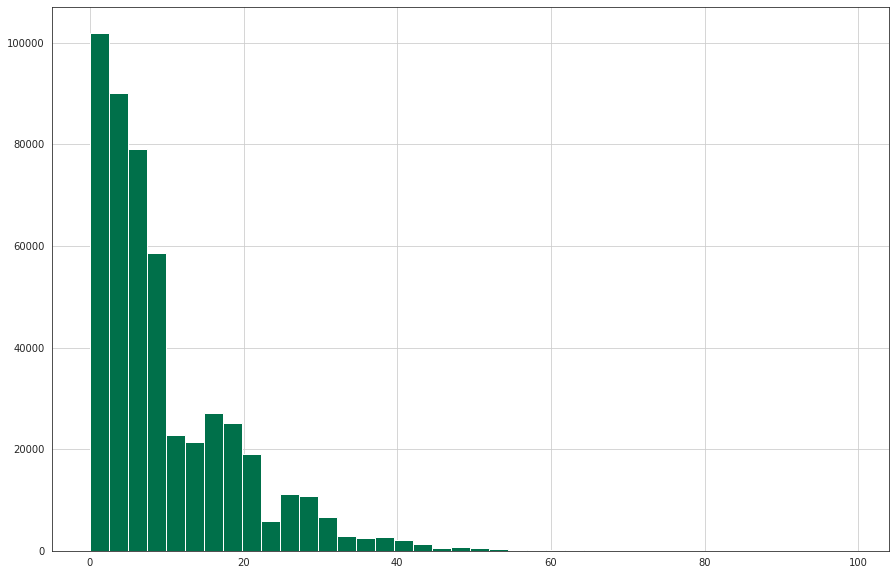

In [ ]:
# Plot histogram of points
df.pts.hist(bins = 40, color = '#00704A')
# As we can see, our histogram is positively skewed

In [ ]:
# Calculate skewness and kurtosis
print("skew:", skew(df.pts))
print("kurt:", kurtosis(df.pts))

skew: 1.4789645443498782
kurt: 2.6505286746959147


In [ ]:
# Convert pts, using Box-Cox transformation
# Create a copy
df_sr = df.copy()
df_sr.pts = np.sqrt(df_sr.pts)

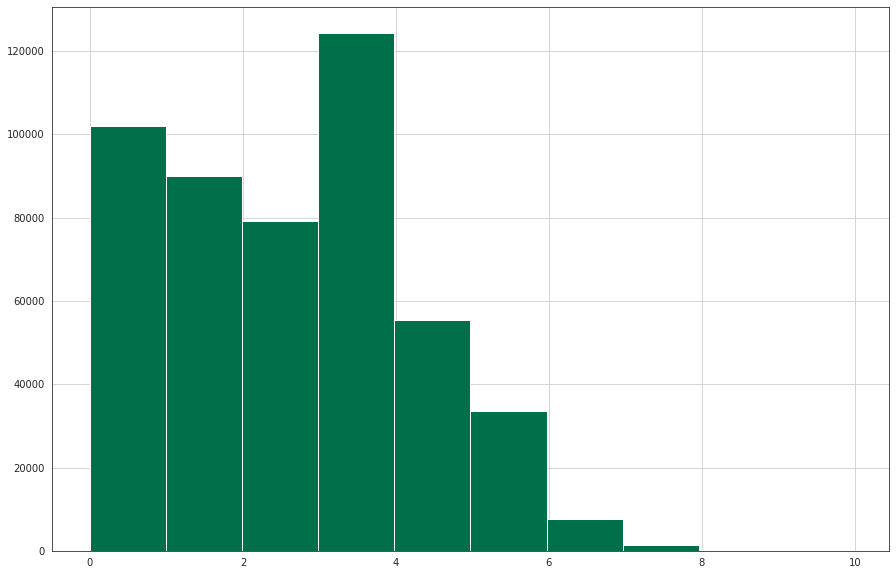

In [ ]:
# Plot histogram of points after Box-Cox transformation.
df_sr.pts.hist(bins = 10, color = '#00704A')
# As we can see, our histogram is still positively skewed

In [ ]:
# Calculate skewness and kurtosis
print("skew:", skew(df_sr.pts))
print("kurt:", kurtosis(df_sr.pts))

skew: 0.06659780751123172
kurt: -0.5948612545950169


### **3. Exploratory modelling with PyCaret**

Before creating models with Sckit-learn, we did the exploratory modelling analysis. For this purposes we used **[PyCaret](https://pycaret.org/about/)**. 

PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.

**PyCaret has own advantages and disadvantages**

Advantages: 

- Easy to work with
- High level overview of multiple regression models and comparison of results
- Ideas for further exploration (accuracy vs time)

Disadvantages: 

- Blackbox solution
- No options to check underfitting/overfitting

In [ ]:
# Select features and create a dataframe for PyCaret analysis
pycaret_df = df[pycaret_features]

In [ ]:
# Print shape
pycaret_df.shape

(493475, 14)

In [ ]:
# Print dataframe
pycaret_df.head()

,pts_500_p,OBP_avg,SLG_avg,SB_avg,RBI_avg,R_avg,home,first_time_pitcher,park_ratio_SLG,whip_SO_B_parkadj,order,ops x pts_500 orderadj,whip_p,pts
0,5568.5,0.259669,0.328313,0.027624,0.080110,0.127072,1,0,1.014082,-0.030815,7.0,497.316820,1.378472,12.2
1,5382.6,0.263587,0.332344,0.027174,0.078804,0.127717,1,0,0.946193,-0.028283,8.0,390.976092,1.317362,0.0
2,5430.1,0.262032,0.338192,0.026738,0.080214,0.128342,1,0,0.961674,-0.035999,7.0,442.466506,1.267492,0.0
3,4656.9,0.261214,0.336207,0.026385,0.079156,0.126649,1,0,1.014547,-0.040154,7.0,445.829441,1.076843,3.5
4,5309.2,0.259740,0.342776,0.025974,0.083117,0.127273,0,0,1.020770,-0.047724,7.0,502.787262,1.321471,6.5


In [ ]:
# Create a basic PyCaret instance
# !pip install pycaret
# Due to importance of this analysis, I will import these libraries here too, because we need to install PyCaret every time. 
import pycaret
from pycaret.regression import *
df_pycaret = setup(data = pycaret_df, target = 'pts', train_size = 0.8, session_id = 123)

,Description,Value
0,session_id,123
1,Target,pts
2,Original Data,"(493475, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(394780, 13)"


In [ ]:
# Compare regression models in PyCaret
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,7.236400e+00,8.869590e+01,9.417800e+00,2.740000e-02,1.2094,7.900000e-01,46.103
lightgbm,Light Gradient Boosting Machine,7.236300e+00,8.870710e+01,9.418400e+00,2.730000e-02,1.2091,7.900000e-01,1.420
br,Bayesian Ridge,7.244600e+00,8.890790e+01,9.429000e+00,2.510000e-02,1.2104,7.907000e-01,0.147
lr,Linear Regression,7.244500e+00,8.890790e+01,9.429000e+00,2.510000e-02,1.2104,7.907000e-01,0.386
catboost,CatBoost Regressor,7.241400e+00,8.890920e+01,9.429100e+00,2.510000e-02,1.2090,7.911000e-01,30.715
lar,Least Angle Regression,7.244500e+00,8.890790e+01,9.429000e+00,2.510000e-02,1.2104,7.907000e-01,0.065
ridge,Ridge Regression,7.244500e+00,8.890790e+01,9.429000e+00,2.510000e-02,1.2104,7.907000e-01,0.054
xgboost,Extreme Gradient Boosting,7.247700e+00,8.909050e+01,9.438700e+00,2.310000e-02,1.2089,7.919000e-01,24.627
omp,Orthogonal Matching Pursuit,7.283700e+00,8.985380e+01,9.479100e+00,1.470000e-02,1.2157,7.938000e-01,0.063
en,Elastic Net,7.281900e+00,8.997980e+01,9.485700e+00,1.330000e-02,1.2180,7.921000e-01,0.144


As you can see, PyCaret allowed us to compare 19 different regression models.
The advantage of this exploratory modelling is the following:

- we can see which models predict well and explore them with `scikit-learn`
- we can compare the results of key metrics and the speed of calcualtion

For instance, we can see that our Ramdom Forest model does not perform well and is the slowest model in our current situation. As a resul, it does not make sense to focus on this model. Instead we can work additionally with some PyCaret models independently.

We will select:

- **Boosting (Gradient Boosting, Light Gradient Boosting Machine)**
- **Regression (Linear, Rigde)**

Boosting algorithms are the best in terms of results, but regressions are also very good and much faster.

Besides, we can see already that PyCaret gives us better results than our baseline benchmark below. Our `MAE` and `RMSE` scores are higher.

![](https://i.ibb.co/31fbdnY/image.png)

#### **3-1. Gradient Boosting in PyCaret**

Now we can quickly explore each model we selected individually to confirm our findings.

PyCare offers different options - we can tune models, create ensembles etc, and we did it during our analysis. But here we present our final workflow only.

In [ ]:
# Create a GBR model in Pycaret (10 folds CV)
gbr_model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.2198,88.0892,9.3856,0.0245,1.2041,0.8012
1,7.2237,88.6479,9.4153,0.0254,1.2102,0.7889
2,7.2572,89.3691,9.4535,0.0286,1.2090,0.7918
3,7.2056,88.2416,9.3937,0.0297,1.2061,0.7842
4,7.2337,88.5083,9.4079,0.0291,1.2030,0.7850
5,7.2648,89.3856,9.4544,0.0254,1.2143,0.7923
6,7.2663,89.9801,9.4858,0.0278,1.2171,0.7870
7,7.2426,88.7014,9.4181,0.0282,1.2082,0.7835
8,7.2093,87.9298,9.3771,0.0271,1.2046,0.7875
9,7.2414,88.1061,9.3865,0.0282,1.2171,0.7983


#### **3-2. LGBM with PyCaret**

In [ ]:
# Create LGBM model
lightgbm_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.2205,88.1216,9.3873,0.0241,1.2039,0.8019
1,7.2226,88.6423,9.4150,0.0254,1.2098,0.7887
2,7.2559,89.3455,9.4523,0.0288,1.2086,0.7918
3,7.2038,88.2415,9.3937,0.0297,1.2059,0.7838
4,7.2337,88.5048,9.4077,0.0291,1.2026,0.7851
5,7.2650,89.4061,9.4555,0.0252,1.2140,0.7924
6,7.2661,89.9779,9.4857,0.0278,1.2168,0.7869
7,7.2408,88.7016,9.4182,0.0282,1.2080,0.7831
8,7.2120,87.9974,9.3807,0.0263,1.2046,0.7881
9,7.2420,88.1319,9.3879,0.0280,1.2169,0.7985


#### **3-3. Linear Regression with PyCaret**

The same work we will do regressions.

In [ ]:
# Create a Linear Regression model in PyCaret
lr_model = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.2218,88.2148,9.3923,0.0231,1.2047,0.7999
1,7.2310,88.8097,9.4239,0.0236,1.2112,0.7903
2,7.2706,89.6610,9.4689,0.0254,1.2105,0.7933
3,7.2147,88.4637,9.4055,0.0272,1.2071,0.7848
4,7.2417,88.7313,9.4197,0.0266,1.2040,0.7855
5,7.2722,89.6406,9.4679,0.0226,1.2153,0.7927
6,7.2744,90.2726,9.5012,0.0247,1.2183,0.7876
7,7.2481,88.8629,9.4267,0.0265,1.2087,0.7843
8,7.2189,88.1074,9.3866,0.0251,1.2058,0.7891
9,7.2513,88.3148,9.3976,0.0259,1.2182,0.7996


#### **3-4. Ridge Regression with PyCaret**

According to PyCaret, this is the fastest algorithm for our analysis. 

In [ ]:
# Create a Ridge Regression model, which has the fastest calculation speed according to PyCaret
ridge_model = create_model('ridge')
# I confirm that this algorithm is fast, it is probably thousands times faster than Random Forest

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.2218,88.2145,9.3923,0.0231,1.2047,0.7999
1,7.2310,88.8092,9.4239,0.0236,1.2112,0.7903
2,7.2706,89.6614,9.4690,0.0254,1.2105,0.7933
3,7.2147,88.4639,9.4055,0.0272,1.2071,0.7848
4,7.2418,88.7316,9.4197,0.0266,1.2040,0.7855
5,7.2722,89.6399,9.4678,0.0226,1.2153,0.7927
6,7.2745,90.2726,9.5012,0.0247,1.2183,0.7876
7,7.2481,88.8631,9.4267,0.0265,1.2087,0.7843
8,7.2190,88.1074,9.3866,0.0251,1.2058,0.7891
9,7.2513,88.3150,9.3976,0.0259,1.2182,0.7996


### **4. Scikit-learn modelling**

Now we can switch our gears and move from a blackbox model, which perform well to a real and explainable `scikit-learn` API.

Here we can start with simple regression models, using only 13 important features we identified after removing all correlated variables. 

#### **4-1. Linear Regression** with Scikit-learn

We can start our analysis with a simple linear regression.

In [ ]:
# Select regression features 
reg_features = ['pts_500_p', 'OBP_avg', 'SLG_avg', 'SB_avg', 
                'RBI_avg', 'R_avg', 'home', 
                'first_time_pitcher', 'park_ratio_SLG', 
                'whip_SO_B_parkadj',
                'order', 'ops x pts_500 orderadj',
                'whip_p']

In [ ]:
# Define X_train and X_test
X_train = df[reg_features][(df['year'] < 2017) & (df['year'] >= 2008)]
X_test = df[reg_features][df['year'] >= 2017]

# Define y_train and y_test
y_train = df['pts'][(df['year'] < 2017) & (df['year'] >= 2008)]
y_test = df['pts'][df['year'] >= 2017]

In [ ]:
# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

In [ ]:
# Create an instance
LR = LinearRegression()

In [ ]:
# Fit the model (subset of data)
LR.fit(X_train_subset, y_train_subset)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predict y_pred
y_pred = LR.predict(X_test)

In [ ]:
# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df['year'][df['year'] >= 2017]})

In [ ]:
# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

In [ ]:
# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

In [ ]:
# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.143127  7.573736   9.914055
2018      0.156040  7.360521   9.543873
2019      0.163572  7.733645  10.115311
Total     0.154732  7.555375   9.859732


As we can see, our linear regression results are comparable with our our baseline benchmark and PyCaret.

Our average `RMSE` score is the better already than our goal and our average `MAE` is slightly worse. However, our correlations results demonstrate the worst performance.

![](https://i.ibb.co/31fbdnY/image.png)

#### **4-2. LGBM with Scikit-learn**


In [ ]:
# Define X_train and X_test
X_train = df[reg_features][(df['year'] < 2017) & (df['year'] >= 2008)]
X_test = df[reg_features][df['year'] >= 2017]

# Define y_train and y_test
y_train = df['pts'][(df['year'] < 2017) & (df['year'] >= 2008)]
y_test = df['pts'][df['year'] >= 2017]

In [ ]:
# Check the size
X_train.shape

(370221, 13)

In [ ]:
# Check the size
X_test.shape

(123254, 13)

In [ ]:
# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

In [ ]:
# Create an instance
LGBM = LGBMRegressor(random_state = 123)
# This is a base LGBM model and I do not add any hyperparameters here.

In [ ]:
# Fit the model (subset of data)
LGBM.fit(X_train_subset, y_train_subset)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
# Predict y_pred
y_pred = LGBM.predict(X_test)

In [ ]:
# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df['year'][df['year'] >= 2017]})

In [ ]:
# Check shape
pred.shape

(123254, 3)

In [ ]:
# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

In [ ]:
# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

In [ ]:
# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.147313  7.560923   9.909286
2018      0.158723  7.347908   9.539692
2019      0.166134  7.716339  10.112300
Total     0.157821  7.541142   9.855752


As we can see, our LGBM results are comparable with our our baseline benchmark and PyCaret.

Our average `RMSE` score is the better already than our goal and our average `MAE` is slightly worse. However, our correlations results demonstrate the worst performance.

![](https://i.ibb.co/31fbdnY/image.png)





#### **4-3. Ridge Regression with Scikit-learn**

The same analysis will be done, using our fastest algorithm.

In [ ]:
# Define X_train and X_test
X_train = df[reg_features][(df['year'] < 2017) & (df['year'] >= 2008)]
X_test = df[reg_features][df['year'] >= 2017]

# Define y_train and y_test
y_train = df['pts'][(df['year'] < 2017) & (df['year'] >= 2008)]
y_test = df['pts'][df['year'] >= 2017]

# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

# Create an instance
RR = Ridge()
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
RR.fit(X_train_subset, y_train_subset)

# Predict y_pred
y_pred = RR.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df['year'][df['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.143134  7.573768   9.914037
2018      0.156037  7.360575   9.543875
2019      0.163576  7.733688  10.115306
Total     0.154735  7.555418   9.859725


Again results are pretty much the same and they are very fast. 

![](https://i.ibb.co/31fbdnY/image.png)

#### **4-4. Gradient Boosting with Scikit-learn**

Finally, we will use our best algorithm (according to PyCaret)

In [ ]:
# Define X_train and X_test
X_train = df[reg_features][(df['year'] < 2017) & (df['year'] >= 2008)]
X_test = df[reg_features][df['year'] >= 2017]

# Define y_train and y_test
y_train = df['pts'][(df['year'] < 2017) & (df['year'] >= 2008)]
y_test = df['pts'][df['year'] >= 2017]

# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

# Create an instance
GBR = GradientBoostingRegressor()
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
GBR.fit(X_train_subset, y_train_subset)

# Predict y_pred
y_pred = GBR.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df['year'][df['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.147304  7.560522   9.908942
2018      0.160851  7.345578   9.536061
2019      0.169188  7.716463  10.107354
Total     0.159577  7.540269   9.852781


We can see that Gradient Boosting gives us the best results. Our average corrlation for 3 years is almost 16%, our average RMSE score is better again and only our MAE score is a slightly worse. 

![](https://i.ibb.co/31fbdnY/image.png)

### **5. Adding `Park` as an extra categorical variable (Sckit-learn)**

In addition to our previous analysis we added `Park` as an extra categorial variable. The reason for this - different fields can be significant for predictions (size, climate, etc).

#### **5-1. Gradient Boosting with Scikit-learn**

In [ ]:
# Print the inital dataframe
df.head()

,game,start,home,team,opp,id,inning,event,park,park_factor_SLG,park_factor_OBP,PA_avg,AB_avg,SAC_avg,HBP_avg,BB_avg,S_avg,D_avg,T_avg,HR_avg,H_avg,TB_avg,SO_avg,RBI_avg,R_avg,CS_avg,SB_avg,park_factor_SLG_avg,park_factor_OBP_avg,OBP_avg,SLG_avg,OPS_avg,OPS_Adj_avg,idx,maxidx,next_game,next_team,next_opp,next_home,next_park_factor_SLG,next_park_factor_OBP,order,pts,pts_500,park_ratio_OBP,park_ratio_SLG,pts_500_parkadj,SLG_avg_parkadj,OPS_avg_parkadj,whip_SO_B,whip_SO_B_parkadj,IP_avg_p,PA_avg_p,AB_avg_p,SAC_avg_p,HBP_avg_p,BB_avg_p,S_avg_p,D_avg_p,T_avg_p,HR_avg_p,H_avg_p,TB_avg_p,SO_avg_p,RBI_avg_p,R_avg_p,CS_avg_p,SB_avg_p,whip_p,whip_SO_p,pts_500_p,OBP_avg_p,SLG_avg_p,OPS_avg_p,OPS_Adj_avg_p,pts_500_parkadj_p,SLG_avg_parkadj_p,OPS_avg_parkadj_p,whip_SO_parkadj_p,whip_parkadj_p,year,first_time_pitcher,ops x pts_500 parkadj,ops x pts_500 orderadj,ops23 x pts_500,ops x pts_500 order15,pts_BxP,SLG_BxP,OPS_BxP,whip_SO_BxP
0,HOU200806070,2008-06-07 18:05:00,1,HOU,SLN,aberr001,5,5/L,HOU,1.009911,0.983534,1.0,0.917127,0.013812,0.013812,0.055249,0.124309,0.041436,0.005525,0.019337,0.190608,0.301105,0.276243,0.080110,0.127072,0.016575,0.027624,0.995886,1.017679,0.259669,0.328313,0.587982,0.795717,380,380,HOU200806110,HOU,MIL,1.0,1.009911,0.983534,7.0,12.2,1.963260,0.966449,1.014082,1.990907,0.332937,0.596262,-0.030387,-0.030815,576.0001,2469.0,2225.0,41.0,13.0,190.0,413.0,106.0,12.0,73.0,604.0,953.0,361.0,267.0,310.0,21.0,29.0,1.378472,0.751736,5568.5,807.0,953.0,1760.0,2405.6,5532.301160,946.804886,1748.558865,0.746849,1.369511,2008,0,3481.217742,497.316820,288.960027,215.810745,11014.296022,315.226043,1042.598986,-0.023014
1,HOU200806150,2008-06-15 13:05:00,1,HOU,NYA,aberr001,9,K,HOU,1.009911,0.983534,1.0,0.915761,0.013587,0.016304,0.054348,0.125000,0.043478,0.005435,0.019022,0.192935,0.304348,0.277174,0.078804,0.127717,0.016304,0.027174,0.996115,1.017122,0.263587,0.332344,0.595931,0.806801,386,386,TBA200806220,HOU,TBA,0.0,0.942517,0.955035,8.0,0.0,1.972554,0.938958,0.946193,1.866417,0.314462,0.563866,-0.029891,-0.028283,591.3334,2528.0,2239.0,40.0,41.0,208.0,363.0,128.0,11.0,69.0,571.0,928.0,445.0,256.0,278.0,19.0,11.0,1.317362,0.564825,5382.6,820.0,928.0,1748.0,2404.0,5160.384643,889.688431,1675.835536,0.541507,1.262976,2008,0,3127.808737,390.976092,263.327606,192.767090,9631.432100,279.773052,944.946700,-0.015315
2,HOU200807020,2008-07-02 19:06:00,1,HOU,LAN,aberr001,8,7/F,HOU,1.009911,0.983534,1.0,0.917112,0.013369,0.016043,0.053476,0.122995,0.042781,0.005348,0.021390,0.192513,0.310160,0.283422,0.080214,0.128342,0.016043,0.026738,0.995796,1.016354,0.262032,0.338192,0.600225,0.809850,392,392,ATL200807050,HOU,ATL,0.0,0.957631,0.993667,7.0,0.0,1.990909,0.977678,0.961674,1.914606,0.325231,0.577221,-0.037433,-0.035999,619.3333,2586.0,2341.0,23.0,15.0,207.0,383.0,121.0,7.0,67.0,578.0,914.0,484.0,243.0,278.0,22.0,47.0,1.267492,0.486006,5430.1,800.0,914.0,1714.0,2354.0,5125.025091,862.649479,1617.703727,0.458702,1.196282,2008,0,3097.265540,442.466506,263.842920,197.051951,9812.404671,280.560326,933.771755,-0.016513
3,HOU200808120,2008-08-12 19:06:00,1,HOU,SFN,aberr001,8,S7/L.2-3,HOU,1.009911,0.983534,1.0,0.918206,0.013193,0.015831,0.052770,0.124011,0.042216,0.005277,0.021108,0.192612,0.308707,0.284960,0.079156,0.126649,0.015831,0.026385,0.995430,1.016028,0.261214,0.336207,0.597421,0.806392,397,397,HOU200808130,HOU,SFN,1.0,1.009911,0.983534,7.0,3.5,1.972559,0.968018,1.014547,2.001254,0.341098,0.606111,-0.039578,-0.040154,646.3335,2589.0,2392.0,24.0,14.0,159.0,381.0,85.0,8.0,63.0,537.0,827.0,778.0,187.0,212.0,17.0,54.0,1.076843,-0.126869,4656.9,710.0,827.0,1537.0,2105.0,4724.845249,839.066121,1559.425186,-0.128721,1.092555,2008,0,3120.806087,445.829441,269.119564,200.992829,9455.616050,286.203514,945.185189,0.005169
4,MIL200808180,2008-08-18 19:08:00,0,HOU,MIL,aberr001,5,HR/7/F,MIL,1.016353,0.998417,1.0,0.916883,0.015584,0.015584,0.051948,0.122078,0.041558,0.005195,0.023377,0.192208,0.314286,0.290909,0.083117,0.127273,0.015584,0.025974,0.9

In [ ]:
# Define important features (+ park) with the correlation below |0.8| (15 only)
park_features = ['pts_500_p', 'OBP_avg', 'pts_500_parkadj', 'SB_avg', 
                    'RBI_avg', 'R_avg', 'home', 
                    'first_time_pitcher', 'park_ratio_SLG', 
                    'whip_SO_B_parkadj',
                    'order', 'ops x pts_500 orderadj',
                    'whip_p', 'park']

In [ ]:
# Create a dataframe with selected features
park_df = df[park_features]

In [ ]:
# Print new dataframe
park_df.head()

,pts_500_p,OBP_avg,pts_500_parkadj,SB_avg,RBI_avg,R_avg,home,first_time_pitcher,park_ratio_SLG,whip_SO_B_parkadj,order,ops x pts_500 orderadj,whip_p,park
0,5568.5,0.259669,1.990907,0.027624,0.080110,0.127072,1,0,1.014082,-0.030815,7.0,497.316820,1.378472,HOU
1,5382.6,0.263587,1.866417,0.027174,0.078804,0.127717,1,0,0.946193,-0.028283,8.0,390.976092,1.317362,HOU
2,5430.1,0.262032,1.914606,0.026738,0.080214,0.128342,1,0,0.961674,-0.035999,7.0,442.466506,1.267492,HOU
3,4656.9,0.261214,2.001254,0.026385,0.079156,0.126649,1,0,1.014547,-0.040154,7.0,445.829441,1.076843,HOU
4,5309.2,0.259740,2.041010,0.025974,0.083117,0.127273,0,0,1.020770,-0.047724,7.0,502.787262,1.321471,MIL


In [ ]:
# Create dummy variables for different stadiums
park_df = pd.get_dummies(park_df, columns = ['park'], drop_first = False, prefix = ['park'])

In [ ]:
# Print new dataframe
park_df.head()

,pts_500_p,OBP_avg,pts_500_parkadj,SB_avg,RBI_avg,R_avg,home,first_time_pitcher,park_ratio_SLG,whip_SO_B_parkadj,order,ops x pts_500 orderadj,whip_p,park_ANA,park_ARI,park_ATL,park_BAL,park_BOS,park_CHA,park_CHN,park_CIN,park_CLE,park_COL,park_DET,park_FLO,park_HOU,park_KCA,park_LAN,park_MIA,park_MIL,park_MIN,park_NYA,park_NYN,park_OAK,park_PHI,park_PIT,park_SDN,park_SEA,park_SFN,park_SLN,park_TBA,park_TEX,park_TOR,park_WAS
0,5568.5,0.259669,1.990907,0.027624,0.080110,0.127072,1,0,1.014082,-0.030815,7.0,497.316820,1.378472,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5382.6,0.263587,1.866417,0.027174,0.078804,0.127717,1,0,0.946193,-0.028283,8.0,390.976092,1.317362,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5430.1,0.262032,1.914606,0.026738,0.080214,0.128342,1,0,0.961674,-0.035999,7.0,442.466506,1.267492,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4656.9,0.261214,2.001254,0.026385,0.079156,0.126649,1,0,1.014547,-0.040154,7.0,445.829441,1.076843,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5309.2,0.259740,2.041010,0.025974,0.083117,0.127273,0,0,1.020770,-0.047724,7.0,502.787262,1.321471,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Check shape
park_df.shape

(493475, 44)

In [ ]:
# Print types
park_df.dtypes

pts_500_p                 float64
OBP_avg                   float64
pts_500_parkadj           float64
SB_avg                    float64
RBI_avg                   float64
R_avg                     float64
home                        int64
first_time_pitcher          int32
park_ratio_SLG            float64
whip_SO_B_parkadj         float64
order                     float64
ops x pts_500 orderadj    float64
whip_p                    float64
park_ANA                    uint8
park_ARI                    uint8
park_ATL                    uint8
park_BAL                    uint8
park_BOS                    uint8
park_CHA                    uint8
park_CHN                    uint8
park_CIN                    uint8
park_CLE                    uint8
park_COL                    uint8
park_DET                    uint8
park_FLO                    uint8
park_HOU                    uint8
park_KCA                    uint8
park_LAN                    uint8
park_MIA                    uint8
park_MIL      

In [ ]:
# Convert all strings to floats
park_df.iloc[:, 13:] = park_df.iloc[:, 13:].astype('float64') / 100

In [ ]:
# Print types again
park_df.dtypes
# Data was transformed

pts_500_p                 float64
OBP_avg                   float64
pts_500_parkadj           float64
SB_avg                    float64
RBI_avg                   float64
R_avg                     float64
home                        int64
first_time_pitcher          int32
park_ratio_SLG            float64
whip_SO_B_parkadj         float64
order                     float64
ops x pts_500 orderadj    float64
whip_p                    float64
park_ANA                  float64
park_ARI                  float64
park_ATL                  float64
park_BAL                  float64
park_BOS                  float64
park_CHA                  float64
park_CHN                  float64
park_CIN                  float64
park_CLE                  float64
park_COL                  float64
park_DET                  float64
park_FLO                  float64
park_HOU                  float64
park_KCA                  float64
park_LAN                  float64
park_MIA                  float64
park_MIL      

In [ ]:
# Define X_train and X_test
X_train = park_df[(df['year'] < 2017) & (df['year'] >= 2008)]
X_test = park_df[df['year'] >= 2017]

# Define y_train and y_test
y_train = df['pts'][(df['year'] < 2017) & (df['year'] >= 20)]
y_test = df['pts'][df['year'] >= 2017]

In [ ]:
# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

In [ ]:
# Create an instance
GBR1 = GradientBoostingRegressor()
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
GBR1.fit(X_train_subset, y_train_subset)

# Predict y_pred
y_pred = GBR1.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df['year'][df['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.148363  7.558939   9.907257
2018      0.161952  7.344461   9.534353
2019      0.169580  7.714716  10.106798
Total     0.160372  7.538788   9.851472


So far this is our best result and a certain improvement due to stadiums as a variable. 

![](https://i.ibb.co/31fbdnY/image.png)

### **6. PCA** 
Now we can try Principal component analysis. 

#### **6-1. PCA with with all numeric features**

Because PCA handles multicollinearity, creating non-correlated principal components, I will use all numeric data

In [ ]:
# Print 
df.head()

,game,start,home,team,opp,id,inning,event,park,park_factor_SLG,park_factor_OBP,PA_avg,AB_avg,SAC_avg,HBP_avg,BB_avg,S_avg,D_avg,T_avg,HR_avg,H_avg,TB_avg,SO_avg,RBI_avg,R_avg,CS_avg,SB_avg,park_factor_SLG_avg,park_factor_OBP_avg,OBP_avg,SLG_avg,OPS_avg,OPS_Adj_avg,idx,maxidx,next_game,next_team,next_opp,next_home,next_park_factor_SLG,next_park_factor_OBP,order,pts,pts_500,park_ratio_OBP,park_ratio_SLG,pts_500_parkadj,SLG_avg_parkadj,OPS_avg_parkadj,whip_SO_B,whip_SO_B_parkadj,IP_avg_p,PA_avg_p,AB_avg_p,SAC_avg_p,HBP_avg_p,BB_avg_p,S_avg_p,D_avg_p,T_avg_p,HR_avg_p,H_avg_p,TB_avg_p,SO_avg_p,RBI_avg_p,R_avg_p,CS_avg_p,SB_avg_p,whip_p,whip_SO_p,pts_500_p,OBP_avg_p,SLG_avg_p,OPS_avg_p,OPS_Adj_avg_p,pts_500_parkadj_p,SLG_avg_parkadj_p,OPS_avg_parkadj_p,whip_SO_parkadj_p,whip_parkadj_p,year,first_time_pitcher,ops x pts_500 parkadj,ops x pts_500 orderadj,ops23 x pts_500,ops x pts_500 order15,pts_BxP,SLG_BxP,OPS_BxP,whip_SO_BxP
0,HOU200806070,2008-06-07 18:05:00,1,HOU,SLN,aberr001,5,5/L,HOU,1.009911,0.983534,1.0,0.917127,0.013812,0.013812,0.055249,0.124309,0.041436,0.005525,0.019337,0.190608,0.301105,0.276243,0.080110,0.127072,0.016575,0.027624,0.995886,1.017679,0.259669,0.328313,0.587982,0.795717,380,380,HOU200806110,HOU,MIL,1.0,1.009911,0.983534,7.0,12.2,1.963260,0.966449,1.014082,1.990907,0.332937,0.596262,-0.030387,-0.030815,576.0001,2469.0,2225.0,41.0,13.0,190.0,413.0,106.0,12.0,73.0,604.0,953.0,361.0,267.0,310.0,21.0,29.0,1.378472,0.751736,5568.5,807.0,953.0,1760.0,2405.6,5532.301160,946.804886,1748.558865,0.746849,1.369511,2008,0,3481.217742,497.316820,288.960027,215.810745,11014.296022,315.226043,1042.598986,-0.023014
1,HOU200806150,2008-06-15 13:05:00,1,HOU,NYA,aberr001,9,K,HOU,1.009911,0.983534,1.0,0.915761,0.013587,0.016304,0.054348,0.125000,0.043478,0.005435,0.019022,0.192935,0.304348,0.277174,0.078804,0.127717,0.016304,0.027174,0.996115,1.017122,0.263587,0.332344,0.595931,0.806801,386,386,TBA200806220,HOU,TBA,0.0,0.942517,0.955035,8.0,0.0,1.972554,0.938958,0.946193,1.866417,0.314462,0.563866,-0.029891,-0.028283,591.3334,2528.0,2239.0,40.0,41.0,208.0,363.0,128.0,11.0,69.0,571.0,928.0,445.0,256.0,278.0,19.0,11.0,1.317362,0.564825,5382.6,820.0,928.0,1748.0,2404.0,5160.384643,889.688431,1675.835536,0.541507,1.262976,2008,0,3127.808737,390.976092,263.327606,192.767090,9631.432100,279.773052,944.946700,-0.015315
2,HOU200807020,2008-07-02 19:06:00,1,HOU,LAN,aberr001,8,7/F,HOU,1.009911,0.983534,1.0,0.917112,0.013369,0.016043,0.053476,0.122995,0.042781,0.005348,0.021390,0.192513,0.310160,0.283422,0.080214,0.128342,0.016043,0.026738,0.995796,1.016354,0.262032,0.338192,0.600225,0.809850,392,392,ATL200807050,HOU,ATL,0.0,0.957631,0.993667,7.0,0.0,1.990909,0.977678,0.961674,1.914606,0.325231,0.577221,-0.037433,-0.035999,619.3333,2586.0,2341.0,23.0,15.0,207.0,383.0,121.0,7.0,67.0,578.0,914.0,484.0,243.0,278.0,22.0,47.0,1.267492,0.486006,5430.1,800.0,914.0,1714.0,2354.0,5125.025091,862.649479,1617.703727,0.458702,1.196282,2008,0,3097.265540,442.466506,263.842920,197.051951,9812.404671,280.560326,933.771755,-0.016513
3,HOU200808120,2008-08-12 19:06:00,1,HOU,SFN,aberr001,8,S7/L.2-3,HOU,1.009911,0.983534,1.0,0.918206,0.013193,0.015831,0.052770,0.124011,0.042216,0.005277,0.021108,0.192612,0.308707,0.284960,0.079156,0.126649,0.015831,0.026385,0.995430,1.016028,0.261214,0.336207,0.597421,0.806392,397,397,HOU200808130,HOU,SFN,1.0,1.009911,0.983534,7.0,3.5,1.972559,0.968018,1.014547,2.001254,0.341098,0.606111,-0.039578,-0.040154,646.3335,2589.0,2392.0,24.0,14.0,159.0,381.0,85.0,8.0,63.0,537.0,827.0,778.0,187.0,212.0,17.0,54.0,1.076843,-0.126869,4656.9,710.0,827.0,1537.0,2105.0,4724.845249,839.066121,1559.425186,-0.128721,1.092555,2008,0,3120.806087,445.829441,269.119564,200.992829,9455.616050,286.203514,945.185189,0.005169
4,MIL200808180,2008-08-18 19:08:00,0,HOU,MIL,aberr001,5,HR/7/F,MIL,1.016353,0.998417,1.0,0.916883,0.015584,0.015584,0.051948,0.122078,0.041558,0.005195,0.023377,0.192208,0.314286,0.290909,0.083117,0.127273,0.015584,0.025974,0.9

In [ ]:
# Remove non-numeric and binary variables
df_pca = df.drop(['game', 'start', 'home', 'team', 'opp', 'id', 'event', 'park', 
                  'next_game', 'idx', 'maxidx', 'next_team', 'next_opp', 'next_home', 'first_time_pitcher', 'year'], axis = 1)

In [ ]:
# Print the df again
df_pca.head()

,inning,park_factor_SLG,park_factor_OBP,PA_avg,AB_avg,SAC_avg,HBP_avg,BB_avg,S_avg,D_avg,T_avg,HR_avg,H_avg,TB_avg,SO_avg,RBI_avg,R_avg,CS_avg,SB_avg,park_factor_SLG_avg,park_factor_OBP_avg,OBP_avg,SLG_avg,OPS_avg,OPS_Adj_avg,next_park_factor_SLG,next_park_factor_OBP,order,pts,pts_500,park_ratio_OBP,park_ratio_SLG,pts_500_parkadj,SLG_avg_parkadj,OPS_avg_parkadj,whip_SO_B,whip_SO_B_parkadj,IP_avg_p,PA_avg_p,AB_avg_p,SAC_avg_p,HBP_avg_p,BB_avg_p,S_avg_p,D_avg_p,T_avg_p,HR_avg_p,H_avg_p,TB_avg_p,SO_avg_p,RBI_avg_p,R_avg_p,CS_avg_p,SB_avg_p,whip_p,whip_SO_p,pts_500_p,OBP_avg_p,SLG_avg_p,OPS_avg_p,OPS_Adj_avg_p,pts_500_parkadj_p,SLG_avg_parkadj_p,OPS_avg_parkadj_p,whip_SO_parkadj_p,whip_parkadj_p,ops x pts_500 parkadj,ops x pts_500 orderadj,ops23 x pts_500,ops x pts_500 order15,pts_BxP,SLG_BxP,OPS_BxP,whip_SO_BxP
0,5,1.009911,0.983534,1.0,0.917127,0.013812,0.013812,0.055249,0.124309,0.041436,0.005525,0.019337,0.190608,0.301105,0.276243,0.080110,0.127072,0.016575,0.027624,0.995886,1.017679,0.259669,0.328313,0.587982,0.795717,1.009911,0.983534,7.0,12.2,1.963260,0.966449,1.014082,1.990907,0.332937,0.596262,-0.030387,-0.030815,576.0001,2469.0,2225.0,41.0,13.0,190.0,413.0,106.0,12.0,73.0,604.0,953.0,361.0,267.0,310.0,21.0,29.0,1.378472,0.751736,5568.5,807.0,953.0,1760.0,2405.6,5532.301160,946.804886,1748.558865,0.746849,1.369511,3481.217742,497.316820,288.960027,215.810745,11014.296022,315.226043,1042.598986,-0.023014
1,9,1.009911,0.983534,1.0,0.915761,0.013587,0.016304,0.054348,0.125000,0.043478,0.005435,0.019022,0.192935,0.304348,0.277174,0.078804,0.127717,0.016304,0.027174,0.996115,1.017122,0.263587,0.332344,0.595931,0.806801,0.942517,0.955035,8.0,0.0,1.972554,0.938958,0.946193,1.866417,0.314462,0.563866,-0.029891,-0.028283,591.3334,2528.0,2239.0,40.0,41.0,208.0,363.0,128.0,11.0,69.0,571.0,928.0,445.0,256.0,278.0,19.0,11.0,1.317362,0.564825,5382.6,820.0,928.0,1748.0,2404.0,5160.384643,889.688431,1675.835536,0.541507,1.262976,3127.808737,390.976092,263.327606,192.767090,9631.432100,279.773052,944.946700,-0.015315
2,8,1.009911,0.983534,1.0,0.917112,0.013369,0.016043,0.053476,0.122995,0.042781,0.005348,0.021390,0.192513,0.310160,0.283422,0.080214,0.128342,0.016043,0.026738,0.995796,1.016354,0.262032,0.338192,0.600225,0.809850,0.957631,0.993667,7.0,0.0,1.990909,0.977678,0.961674,1.914606,0.325231,0.577221,-0.037433,-0.035999,619.3333,2586.0,2341.0,23.0,15.0,207.0,383.0,121.0,7.0,67.0,578.0,914.0,484.0,243.0,278.0,22.0,47.0,1.267492,0.486006,5430.1,800.0,914.0,1714.0,2354.0,5125.025091,862.649479,1617.703727,0.458702,1.196282,3097.265540,442.466506,263.842920,197.051951,9812.404671,280.560326,933.771755,-0.016513
3,8,1.009911,0.983534,1.0,0.918206,0.013193,0.015831,0.052770,0.124011,0.042216,0.005277,0.021108,0.192612,0.308707,0.284960,0.079156,0.126649,0.015831,0.026385,0.995430,1.016028,0.261214,0.336207,0.597421,0.806392,1.009911,0.983534,7.0,3.5,1.972559,0.968018,1.014547,2.001254,0.341098,0.606111,-0.039578,-0.040154,646.3335,2589.0,2392.0,24.0,14.0,159.0,381.0,85.0,8.0,63.0,537.0,827.0,778.0,187.0,212.0,17.0,54.0,1.076843,-0.126869,4656.9,710.0,827.0,1537.0,2105.0,4724.845249,839.066121,1559.425186,-0.128721,1.092555,3120.806087,445.829441,269.119564,200.992829,9455.616050,286.203514,945.185189,0.005169
4,5,1.016353,0.998417,1.0,0.916883,0.015584,0.015584,0.051948,0.122078,0.041558,0.005195,0.023377,0.192208,0.314286,0.290909,0.083117,0.127273,0.015584,0.025974,0.995673,1.015561,0.259740,0.342776,0.602516,0.810309,1.016353,0.998417,7.0,6.5,1.999481,0.983119,1.020770,2.041010,0.349896,0.615031,-0.046753,-0.047724,571.3330,2422.0,2122.0,48.0,25.0,227.0,335.0,119.0,12.0,62.0,528.0,857.0,485.0,242.0,276.0,18.0,42.0,1.321471,0.472579,5309.2,780.0,857.0,1637.0,2261.0,5592.650009,902.753910,1724.396908,0.497809,1.392022,3519.510835,502.787262,293.496704,219.198977,11414.652978,315.869677,1060.557080,-0.023758


In [ ]:
# Standardize data for applying PCA

# Create a copy
df_pca_s = df_pca.copy()

# Standardize
scaler = StandardScaler()
df_pca_s.loc[:, df_pca_s.columns != 'pts'] = scaler.fit_transform(df_pca_s.loc[:, 
                                                        df_pca_s.columns != 'pts'])

In [ ]:
# Print new dataframe
df_pca_s.head()

,inning,park_factor_SLG,park_factor_OBP,PA_avg,AB_avg,SAC_avg,HBP_avg,BB_avg,S_avg,D_avg,T_avg,HR_avg,H_avg,TB_avg,SO_avg,RBI_avg,R_avg,CS_avg,SB_avg,park_factor_SLG_avg,park_factor_OBP_avg,OBP_avg,SLG_avg,OPS_avg,OPS_Adj_avg,next_park_factor_SLG,next_park_factor_OBP,order,pts,pts_500,park_ratio_OBP,park_ratio_SLG,pts_500_parkadj,SLG_avg_parkadj,OPS_avg_parkadj,whip_SO_B,whip_SO_B_parkadj,IP_avg_p,PA_avg_p,AB_avg_p,SAC_avg_p,HBP_avg_p,BB_avg_p,S_avg_p,D_avg_p,T_avg_p,HR_avg_p,H_avg_p,TB_avg_p,SO_avg_p,RBI_avg_p,R_avg_p,CS_avg_p,SB_avg_p,whip_p,whip_SO_p,pts_500_p,OBP_avg_p,SLG_avg_p,OPS_avg_p,OPS_Adj_avg_p,pts_500_parkadj_p,SLG_avg_parkadj_p,OPS_avg_parkadj_p,whip_SO_parkadj_p,whip_parkadj_p,ops x pts_500 parkadj,ops x pts_500 orderadj,ops23 x pts_500,ops x pts_500 order15,pts_BxP,SLG_BxP,OPS_BxP,whip_SO_BxP
0,-2.347564,0.185862,-0.503578,0.144813,0.619361,0.295027,0.532698,-0.851838,-0.867008,-0.352976,0.091815,-0.532315,-1.255243,-1.059583,1.285429,-0.916613,0.326464,1.678449,0.681214,-0.192719,1.158387,-1.583108,-1.141738,-1.390852,-1.471245,0.185272,-0.503713,0.911370,12.2,-0.759436,-1.121630,0.305188,-0.667857,-1.052513,-1.259198,-1.794306,-1.793299,1.001637,1.050214,1.034214,1.515527,0.125148,1.123427,1.252354,0.849011,0.937124,1.276652,1.191284,1.182741,0.383652,1.240208,1.366612,1.683050,0.358688,0.007351,0.007092,1.189235,1.172734,1.182741,1.181278,1.179709,1.160979,1.154789,1.153499,0.007132,0.00737,0.763758,-0.277803,0.647323,0.409905,0.769254,0.552336,0.577164,0.006576
1,0.655146,0.185862,-0.503578,0.144813,0.579272,0.269444,0.814316,-0.878988,-0.846840,-0.223835,0.076408,-0.550410,-1.188867,-1.014572,1.299914,-0.952102,0.349767,1.636501,0.656493,-0.183587,1.121308,-1.491353,-1.092515,-1.322205,-1.395437,-1.095426,-1.383891,1.317631,0.0,-0.736980,-2.052212,-1.117243,-0.959119,-1.271870,-1.526896,-1.788566,-1.764049,1.067832,1.111204,1.050106,1.445726,3.106320,1.369904,0.921701,1.332376,0.754724,1.127403,1.044235,1.112148,0.785438,1.126465,1.067786,1.400409,-0.554560,0.007351,0.007092,1.098498,1.216226,1.112148,1.162854,1.177911,0.980701,0.994613,1.042589,0.007132,0.00737,0.541968,-0.391427,0.431002,0.181737,0.493405,0.332727,0.388131,0.006576
2,-0.095532,0.185862,-0.503578,0.144813,0.618927,0.244682,0.784759,-0.905266,-0.905404,-0.267952,0.061495,-0.414465,-1.200887,-0.933893,1.397150,-0.913803,0.372322,1.595900,0.632565,-0.196338,1.070192,-1.527762,-1.021102,-1.285131,-1.374581,-0.808211,-0.190761,0.911370,0.0,-0.692634,-0.741512,-0.792878,-0.846374,-1.144005,-1.416543,-1.875944,-1.853191,1.188710,1.171160,1.165894,0.259095,0.338089,1.356211,1.053962,1.178578,0.025123,1.052779,1.075427,1.072616,0.971982,0.992041,1.067786,1.824371,1.271936,0.007351,0.007092,1.121682,1.149314,1.072616,1.110651,1.121723,0.963561,0.918785,0.953933,0.007132,0.00737,0.522800,-0.336410,0.435351,0.224164,0.529505,0.337604,0.366499,0.006576
3,-0.095532,0.185862,-0.503578,0.144813,0.651014,0.224646,0.760843,-0.926529,-0.875736,-0.303649,0.049428,-0.430661,-1.198070,-0.954065,1.421084,-0.942556,0.311204,1.563047,0.613204,-0.210938,1.048476,-1.546925,-1.045347,-1.309343,-1.398236,0.185272,-0.503713,0.911370,3.5,-0.736968,-1.068495,0.314925,-0.643648,-0.955615,-1.177809,-1.900791,-1.901197,1.305271,1.174261,1.223787,0.328897,0.231619,0.698941,1.040736,0.387617,0.207523,0.903530,0.892729,0.826954,2.378233,0.412985,0.451456,1.117767,1.627088,0.007351,0.007092,0.744287,0.848211,0.826954,0.838890,0.841908,0.769584,0.852649,0.865052,0.007132,0.00737,0.537574,-0.332817,0.479882,0.263184,0.458333,0.372560,0.388593,0.006576
4,-2.347564,0.308163,-0.043876,0.144813,0.612202,0.496359,0.732963,-0.951315,-0.932176,-0.345261,0.035362,-0.300467,-1.209603,-0.876633,1.513654,-0.834928,0.333716,1.524751,0.590634,-0.201256,1.017322,-1.581428,-0.965128,-1.265339,-1.371445,0.307691,-0.044065,0.911370,6.5,-0.671925,-0.557319,0.445312,-0.550633,-0.851154,-1.104104,-1.983923,-1.988665,0.981489,1.001629,0.917291,2.004140,1.402793,1.630073,0.736536,1.134635,0.937124,0.

In [ ]:
# Drop the predictor variable
df_pca_s_final = df_pca_s.copy()
df_pca_s_final = df_pca_s_final.drop(['pts'], axis = 1)

# Run PCA and fit the model
myPCA = PCA()

# Fit the model
x = myPCA.fit(df_pca_s_final)

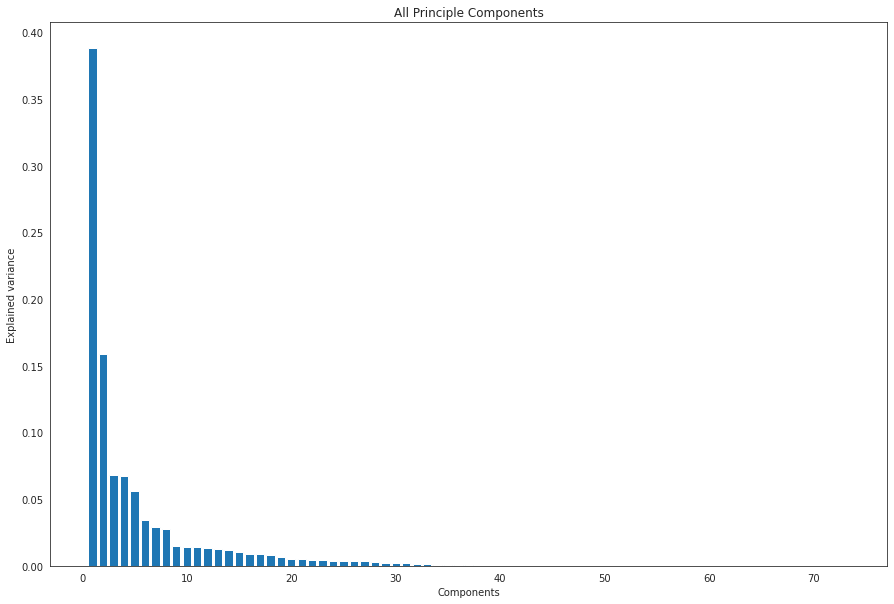

In [ ]:
# Plotting the varaince explained by each component
plt.bar(range(1,len(x.explained_variance_ )+1),x.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.title('All Principle Components')
pass

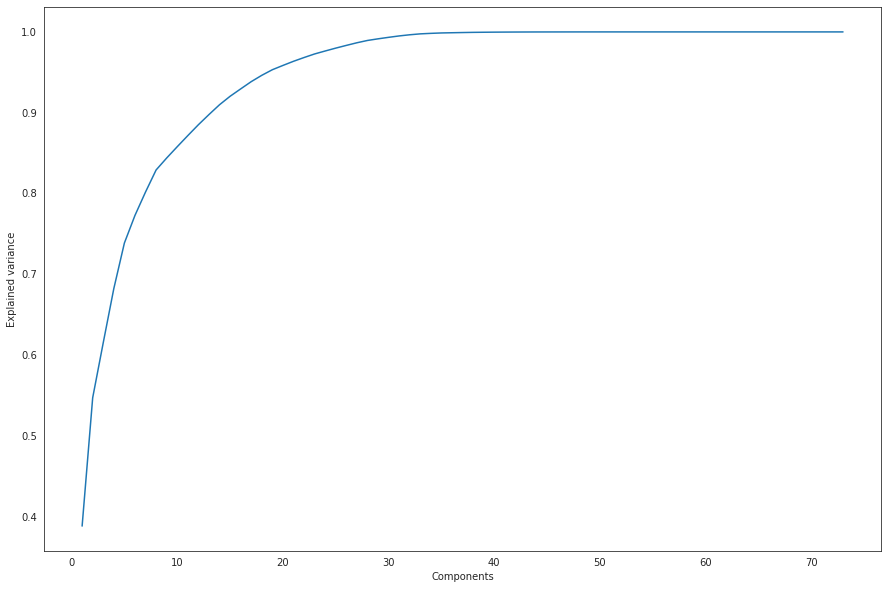

In [ ]:
# Deciding on the number of principal componenets to chose
plt.plot(range(1, len(x.explained_variance_)+1), x.explained_variance_ratio_.cumsum())
plt.ylabel('Explained variance')
plt.xlabel('Components')
pass

In [ ]:
# Calculate the numeric values of principal components
x.explained_variance_ratio_.cumsum()
# As we can see, first 7 components explain 80% of our variance

array([0.3882581 , 0.54716532, 0.61534639, 0.6823168 , 0.73867368,
       0.77283748, 0.80181616, 0.82909111, 0.84388351, 0.85788914,
       0.87162661, 0.8850791 , 0.89766125, 0.90982522, 0.9203009 ,
       0.92942772, 0.93842781, 0.94626378, 0.95319289, 0.95848585,
       0.96361743, 0.96828701, 0.97271744, 0.97637642, 0.97993875,
       0.98330223, 0.98655794, 0.98941286, 0.99143033, 0.99329191,
       0.99502076, 0.99645188, 0.99758253, 0.99820658, 0.99870563,
       0.9989712 , 0.99922139, 0.99943782, 0.99957996, 0.99970115,
       0.99978083, 0.99984419, 0.99989347, 0.99992872, 0.9999457 ,
       0.99995965, 0.9999727 , 0.99998226, 0.99998871, 0.99999481,
       0.99999656, 0.9999979 , 0.99999868, 0.99999913, 0.99999954,
       0.99999974, 0.99999985, 0.99999993, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [ ]:
# Explore the importance of each feature for principle components
pca = PCA(n_components = 7).fit(df_pca_s_final)
vars = pca.explained_variance_ratio_
c_names = df_pca_s_final.columns
sum = 0

print('Variance:  Projected dimension')
print('------------------------------')
for idx, row in enumerate(pca.components_):
    output = '{0:4.1f}%:    '.format(100.0 * vars[idx])
    output += " + ".join("{0:5.2f} * {1:s}".format(val, name) \
                      for val, name in zip(row, c_names))
    sum += 100*vars[idx]
    print(output)

print('Total variance explained by the 7 components {0:4.1f}%'.format(sum))
# Total variance explained by the 7 components 80.2%

Variance:  Projected dimension
------------------------------
38.8%:    -0.00 * inning +  0.01 * park_factor_SLG +  0.01 * park_factor_OBP +  0.00 * PA_avg + -0.01 * AB_avg + -0.00 * SAC_avg +  0.00 * HBP_avg +  0.01 * BB_avg +  0.00 * S_avg +  0.01 * D_avg +  0.00 * T_avg +  0.01 * HR_avg +  0.01 * H_avg +  0.02 * TB_avg + -0.00 * SO_avg +  0.01 * RBI_avg +  0.01 * R_avg +  0.00 * CS_avg +  0.00 * SB_avg +  0.00 * park_factor_SLG_avg +  0.00 * park_factor_OBP_avg +  0.01 * OBP_avg +  0.02 * SLG_avg +  0.02 * OPS_avg +  0.02 * OPS_Adj_avg +  0.01 * next_park_factor_SLG +  0.01 * next_park_factor_OBP + -0.01 * order +  0.02 * pts_500 +  0.01 * park_ratio_OBP +  0.01 * park_ratio_SLG +  0.02 * pts_500_parkadj +  0.02 * SLG_avg_parkadj +  0.02 * OPS_avg_parkadj +  0.01 * whip_SO_B +  0.01 * whip_SO_B_parkadj +  0.18 * IP_avg_p +  0.19 * PA_avg_p +  0.18 * AB_avg_p +  0.16 * SAC_avg_p +  0.15 * HBP_avg_p +  0.17 * BB_avg_p +  0.18 * S_avg_p +  0.18 * D_avg_p +  0.16 * T_avg_p +  0.18 * HR_

In [ ]:
# Calculate loadings
myPCA = PCA(n_components = 7)
pca_model = myPCA.fit(df_pca_s_final)

# Print
print("The loadings are are \n {}".format(pca_model.components_))

The loadings are are 
 [[-8.17894076e-05  7.87076710e-03  7.35103360e-03  4.47078162e-05
  -5.06832088e-03 -3.62514192e-03  5.00438221e-04  6.03565397e-03
   1.69488275e-03  7.45847037e-03  3.09399464e-03  1.17223440e-02
   1.13608139e-02  1.61720492e-02 -2.88681155e-03  1.23741775e-02
   1.42444056e-02  1.66974513e-03  3.97518214e-03  3.04434846e-03
   2.64677758e-03  1.41223139e-02  1.68216460e-02  1.71039440e-02
   1.68464327e-02  1.16204269e-02  1.04398588e-02 -9.86975377e-03
   1.78806573e-02  1.00777246e-02  1.11914279e-02  2.01610298e-02
   1.90286275e-02  1.96689191e-02  9.08384309e-03  9.80640882e-03
   1.84043428e-01  1.85160265e-01  1.84796206e-01  1.64842177e-01
   1.49403450e-01  1.72137520e-01  1.83334105e-01  1.82475982e-01
   1.56430629e-01  1.75435509e-01  1.85292483e-01  1.85518271e-01
   1.69281926e-01  1.84488386e-01  1.84356872e-01  1.56717834e-01
   1.39693287e-01  2.36783311e-03  2.29260549e-03  1.86020587e-01
   1.85852094e-01  1.85518271e-01  1.86161782e-01  1.

In [ ]:
# We also can see this information for each component separately
# For instance, these are results for the Principal Component 1 (sorted)
pd.DataFrame(np.column_stack((df_pca_s_final.columns, pca_model.components_[0]))).sort_values(by = 1, ascending = False)
# The same logic can be applied to all other principal components

,0,1
62,OPS_avg_parkadj_p,0.186239
59,OPS_Adj_avg_p,0.186193
58,OPS_avg_p,0.186162
60,pts_500_parkadj_p,0.186072
55,pts_500_p,0.186021
56,OBP_avg_p,0.185852
61,SLG_avg_parkadj_p,0.185573
57,SLG_avg_p,0.185518
47,TB_avg_p,0.185518
46,H_avg_p,0.185292


<font color='red'>Serena, please take a look</font>

#### **6-2. PCA with the most important GB features**

In [ ]:
# Select features (removing 3 highly correlated variables)
pca_features2 = ['order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
                 'pts_500', 'BB_avg', 'HR_avg', 'CS_avg']

In [ ]:
# Create a dataframe
df_pca2 = df[pca_features2]

In [ ]:
# Standardize data for applying PCA

# Create a copy
df_pca2_s = df_pca2.copy()

# Standardize
scaler = StandardScaler()
df_pca2_s.loc[:, df_pca2_s.columns != 'pts'] = scaler.fit_transform(df_pca2_s.loc[:, 
                                                        df_pca2_s.columns != 'pts'])

In [ ]:
# Print
df_pca2_s.head()

,order,park_ratio_SLG,next_park_factor_OBP,S_avg,SB_avg,pts_500,BB_avg,HR_avg,CS_avg
0,0.911370,0.305188,-0.503713,-0.867008,0.681214,-0.759436,-0.851838,-0.532315,1.678449
1,1.317631,-1.117243,-1.383891,-0.846840,0.656493,-0.736980,-0.878988,-0.550410,1.636501
2,0.911370,-0.792878,-0.190761,-0.905404,0.632565,-0.692634,-0.905266,-0.414465,1.595900
3,0.911370,0.314925,-0.503713,-0.875736,0.613204,-0.736968,-0.926529,-0.430661,1.563047
4,0.911370,0.445312,-0.044065,-0.932176,0.590634,-0.671925,-0.951315,-0.300467,1.524751


In [ ]:
# Drop the predictor variable
df_pca2_s_final = df_pca2_s.copy()
# df_pca2_s_final = df_pca2_s_final.drop(['pts'], axis = 1)

# Run PCA and fit the model
myPCA2 = PCA()

# Fit the model
x = myPCA2.fit(df_pca2_s_final)

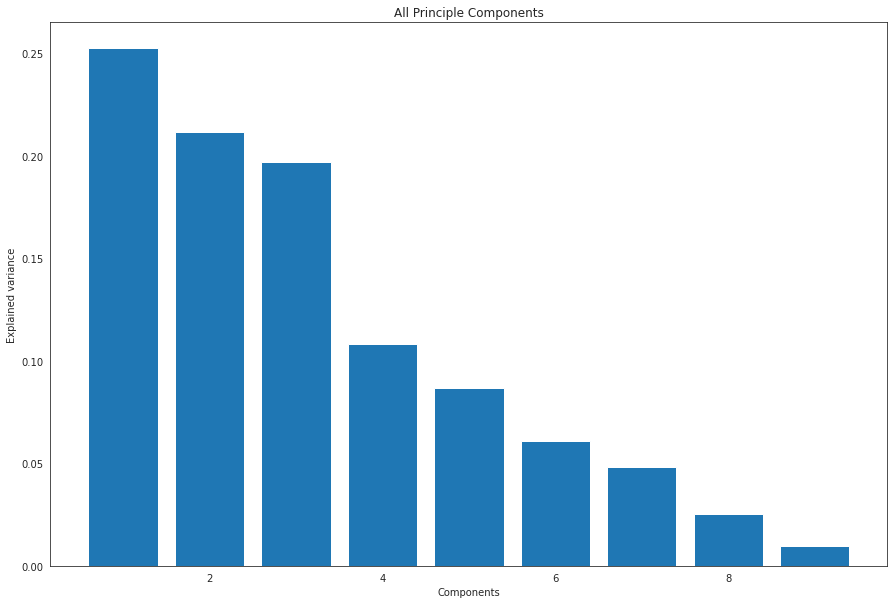

In [ ]:
# Plotting the varaince explained by each component
plt.bar(range(1, len(x.explained_variance_ )+1), x.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.title('All Principle Components')
pass

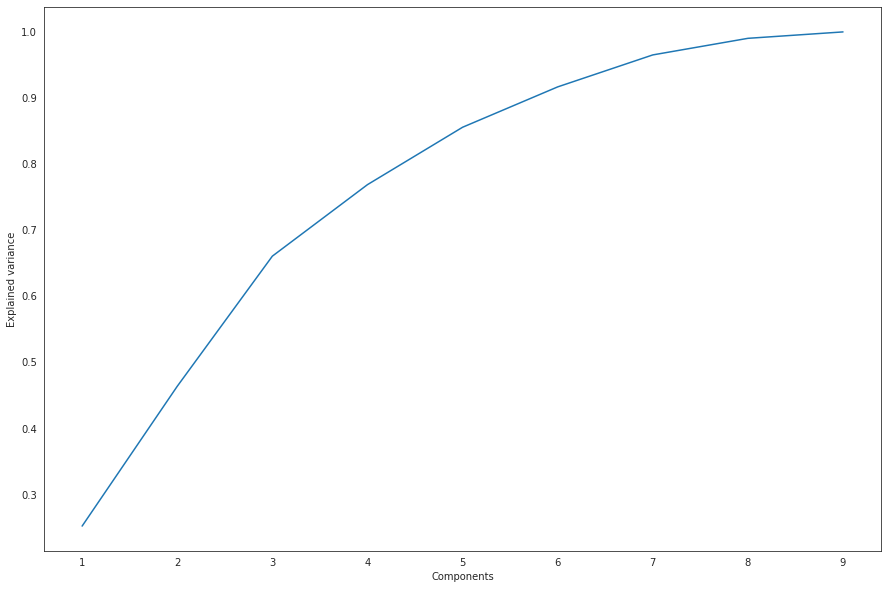

In [ ]:
# Deciding on the number of principal componenets to chose
plt.plot(range(1, len(x.explained_variance_)+1), x.explained_variance_ratio_.cumsum())
plt.ylabel('Explained variance')
plt.xlabel('Components')
pass

In [ ]:
# Calculate the numeric values of principal components
x.explained_variance_ratio_.cumsum()
# As we can see, first 7 components explain 80% of our variance

array([0.25242338, 0.46389205, 0.66077639, 0.76893658, 0.85577138,
       0.9168291 , 0.9652015 , 0.99029075, 1.        ])

In [ ]:
# Explore the importance of each feature for principle components
pca = PCA(n_components = 5).fit(df_pca2_s_final)
vars = pca.explained_variance_ratio_
c_names = df_pca2_s_final.columns
sum = 0

print('Variance:  Projected dimension')
print('------------------------------')
for idx, row in enumerate(pca.components_):
    output = '{0:4.1f}%:    '.format(100.0 * vars[idx])
    output += " + ".join("{0:5.2f} * {1:s}".format(val, name) \
                      for val, name in zip(row, c_names))
    sum += 100*vars[idx]
    print(output)

print('Total variance explained by the 7 components {0:4.1f}%'.format(sum))
# Total variance explained by the 5 components 85.6%

Variance:  Projected dimension
------------------------------
25.2%:    -0.09 * order + -0.02 * park_ratio_SLG + -0.02 * next_park_factor_OBP + -0.39 * S_avg + -0.25 * SB_avg +  0.45 * pts_500 +  0.40 * BB_avg +  0.58 * HR_avg + -0.28 * CS_avg
21.1%:    -0.49 * order + -0.06 * park_ratio_SLG + -0.06 * next_park_factor_OBP +  0.24 * S_avg +  0.53 * SB_avg +  0.44 * pts_500 +  0.14 * BB_avg +  0.09 * HR_avg +  0.44 * CS_avg
19.7%:    -0.04 * order +  0.70 * park_ratio_SLG +  0.70 * next_park_factor_OBP +  0.02 * S_avg +  0.04 * SB_avg +  0.07 * pts_500 + -0.00 * BB_avg +  0.04 * HR_avg +  0.03 * CS_avg
10.8%:     0.35 * order +  0.04 * park_ratio_SLG + -0.01 * next_park_factor_OBP + -0.59 * S_avg +  0.29 * SB_avg + -0.19 * pts_500 +  0.43 * BB_avg + -0.15 * HR_avg +  0.45 * CS_avg
 8.7%:     0.49 * order + -0.05 * park_ratio_SLG +  0.01 * next_park_factor_OBP + -0.10 * S_avg +  0.17 * SB_avg +  0.26 * pts_500 + -0.63 * BB_avg +  0.44 * HR_avg +  0.24 * CS_avg
Total variance explained by 

In [ ]:
# Calculate loadings
myPCA2 = PCA(n_components = 5)
pca_model2 = myPCA2.fit(df_pca2_s_final)

# Print
print("The loadings are are \n {}".format(pca_model2.components_))

The loadings are are 
 [[-0.09203131 -0.01746668 -0.0238243  -0.39222468 -0.25366158  0.44867775
   0.39727567  0.57969817 -0.27799911]
 [-0.49138263 -0.06334854 -0.06170115  0.23920757  0.52795612  0.43582194
   0.13771472  0.09179967  0.44433302]
 [-0.03540381  0.70303214  0.70410925  0.0220725   0.03869927  0.06555107
  -0.00110771  0.04017182  0.02873602]
 [ 0.34762134  0.04087478 -0.01201623 -0.58900384  0.2866454  -0.19327403
   0.4309603  -0.14646963  0.45135149]
 [ 0.4933247  -0.05066211  0.00934226 -0.0980732   0.17221794  0.25585334
  -0.63184303  0.43737042  0.24232212]]


In [ ]:
# We also can see this information for each component separately
# For instance, these are results for the Principal Component 1 (sorted)
pd.DataFrame(np.column_stack((df_pca2_s_final.columns, pca_model2.components_[0]))).sort_values(by = 1, ascending = False)
# The same logic can be applied to all other principal components

,0,1
7,HR_avg,0.579698
5,pts_500,0.448678
6,BB_avg,0.397276
1,park_ratio_SLG,-0.0174667
2,next_park_factor_OBP,-0.0238243
0,order,-0.0920313
4,SB_avg,-0.253662
8,CS_avg,-0.277999
3,S_avg,-0.392225


<font color='red'>Serena, please take a look</font>

### **7. Feature selection (for PCA(6-2) and GB(8-2))**

**A comment from Mike:**

*Also, Oleksiy, do you think you have handled collinearity in the best way? One method I was thinking about was to maybe run a RandomForest model, exclude all fields below a certain feature importance threshold, then run PCA on fields that meet the threshold and use that as the training data. But that might not be necessary, your call.*

In [ ]:
# Drop some columns
df_important = df.copy()
df_important = df_important.drop(['game', 'start', 'id', 'team', 'opp', 'id', 'event', 'next_team', 'next_opp', 'idx', 'maxidx', 'next_game'], axis = 1)

In [ ]:
# Print the intial dataframe again
df.head()

,game,start,home,team,opp,id,inning,event,park,park_factor_SLG,park_factor_OBP,PA_avg,AB_avg,SAC_avg,HBP_avg,BB_avg,S_avg,D_avg,T_avg,HR_avg,H_avg,TB_avg,SO_avg,RBI_avg,R_avg,CS_avg,SB_avg,park_factor_SLG_avg,park_factor_OBP_avg,OBP_avg,SLG_avg,OPS_avg,OPS_Adj_avg,idx,maxidx,next_game,next_team,next_opp,next_home,next_park_factor_SLG,next_park_factor_OBP,order,pts,pts_500,park_ratio_OBP,park_ratio_SLG,pts_500_parkadj,SLG_avg_parkadj,OPS_avg_parkadj,whip_SO_B,whip_SO_B_parkadj,IP_avg_p,PA_avg_p,AB_avg_p,SAC_avg_p,HBP_avg_p,BB_avg_p,S_avg_p,D_avg_p,T_avg_p,HR_avg_p,H_avg_p,TB_avg_p,SO_avg_p,RBI_avg_p,R_avg_p,CS_avg_p,SB_avg_p,whip_p,whip_SO_p,pts_500_p,OBP_avg_p,SLG_avg_p,OPS_avg_p,OPS_Adj_avg_p,pts_500_parkadj_p,SLG_avg_parkadj_p,OPS_avg_parkadj_p,whip_SO_parkadj_p,whip_parkadj_p,year,first_time_pitcher,ops x pts_500 parkadj,ops x pts_500 orderadj,ops23 x pts_500,ops x pts_500 order15,pts_BxP,SLG_BxP,OPS_BxP,whip_SO_BxP
0,HOU200806070,2008-06-07 18:05:00,1,HOU,SLN,aberr001,5,5/L,HOU,1.009911,0.983534,1.0,0.917127,0.013812,0.013812,0.055249,0.124309,0.041436,0.005525,0.019337,0.190608,0.301105,0.276243,0.080110,0.127072,0.016575,0.027624,0.995886,1.017679,0.259669,0.328313,0.587982,0.795717,380,380,HOU200806110,HOU,MIL,1.0,1.009911,0.983534,7.0,12.2,1.963260,0.966449,1.014082,1.990907,0.332937,0.596262,-0.030387,-0.030815,576.0001,2469.0,2225.0,41.0,13.0,190.0,413.0,106.0,12.0,73.0,604.0,953.0,361.0,267.0,310.0,21.0,29.0,1.378472,0.751736,5568.5,807.0,953.0,1760.0,2405.6,5532.301160,946.804886,1748.558865,0.746849,1.369511,2008,0,3481.217742,497.316820,288.960027,215.810745,11014.296022,315.226043,1042.598986,-0.023014
1,HOU200806150,2008-06-15 13:05:00,1,HOU,NYA,aberr001,9,K,HOU,1.009911,0.983534,1.0,0.915761,0.013587,0.016304,0.054348,0.125000,0.043478,0.005435,0.019022,0.192935,0.304348,0.277174,0.078804,0.127717,0.016304,0.027174,0.996115,1.017122,0.263587,0.332344,0.595931,0.806801,386,386,TBA200806220,HOU,TBA,0.0,0.942517,0.955035,8.0,0.0,1.972554,0.938958,0.946193,1.866417,0.314462,0.563866,-0.029891,-0.028283,591.3334,2528.0,2239.0,40.0,41.0,208.0,363.0,128.0,11.0,69.0,571.0,928.0,445.0,256.0,278.0,19.0,11.0,1.317362,0.564825,5382.6,820.0,928.0,1748.0,2404.0,5160.384643,889.688431,1675.835536,0.541507,1.262976,2008,0,3127.808737,390.976092,263.327606,192.767090,9631.432100,279.773052,944.946700,-0.015315
2,HOU200807020,2008-07-02 19:06:00,1,HOU,LAN,aberr001,8,7/F,HOU,1.009911,0.983534,1.0,0.917112,0.013369,0.016043,0.053476,0.122995,0.042781,0.005348,0.021390,0.192513,0.310160,0.283422,0.080214,0.128342,0.016043,0.026738,0.995796,1.016354,0.262032,0.338192,0.600225,0.809850,392,392,ATL200807050,HOU,ATL,0.0,0.957631,0.993667,7.0,0.0,1.990909,0.977678,0.961674,1.914606,0.325231,0.577221,-0.037433,-0.035999,619.3333,2586.0,2341.0,23.0,15.0,207.0,383.0,121.0,7.0,67.0,578.0,914.0,484.0,243.0,278.0,22.0,47.0,1.267492,0.486006,5430.1,800.0,914.0,1714.0,2354.0,5125.025091,862.649479,1617.703727,0.458702,1.196282,2008,0,3097.265540,442.466506,263.842920,197.051951,9812.404671,280.560326,933.771755,-0.016513
3,HOU200808120,2008-08-12 19:06:00,1,HOU,SFN,aberr001,8,S7/L.2-3,HOU,1.009911,0.983534,1.0,0.918206,0.013193,0.015831,0.052770,0.124011,0.042216,0.005277,0.021108,0.192612,0.308707,0.284960,0.079156,0.126649,0.015831,0.026385,0.995430,1.016028,0.261214,0.336207,0.597421,0.806392,397,397,HOU200808130,HOU,SFN,1.0,1.009911,0.983534,7.0,3.5,1.972559,0.968018,1.014547,2.001254,0.341098,0.606111,-0.039578,-0.040154,646.3335,2589.0,2392.0,24.0,14.0,159.0,381.0,85.0,8.0,63.0,537.0,827.0,778.0,187.0,212.0,17.0,54.0,1.076843,-0.126869,4656.9,710.0,827.0,1537.0,2105.0,4724.845249,839.066121,1559.425186,-0.128721,1.092555,2008,0,3120.806087,445.829441,269.119564,200.992829,9455.616050,286.203514,945.185189,0.005169
4,MIL200808180,2008-08-18 19:08:00,0,HOU,MIL,aberr001,5,HR/7/F,MIL,1.016353,0.998417,1.0,0.916883,0.015584,0.015584,0.051948,0.122078,0.041558,0.005195,0.023377,0.192208,0.314286,0.290909,0.083117,0.127273,0.015584,0.025974,0.9

In [ ]:
# Print df
df_important.head()

,home,inning,park,park_factor_SLG,park_factor_OBP,PA_avg,AB_avg,SAC_avg,HBP_avg,BB_avg,S_avg,D_avg,T_avg,HR_avg,H_avg,TB_avg,SO_avg,RBI_avg,R_avg,CS_avg,SB_avg,park_factor_SLG_avg,park_factor_OBP_avg,OBP_avg,SLG_avg,OPS_avg,OPS_Adj_avg,next_home,next_park_factor_SLG,next_park_factor_OBP,order,pts,pts_500,park_ratio_OBP,park_ratio_SLG,pts_500_parkadj,SLG_avg_parkadj,OPS_avg_parkadj,whip_SO_B,whip_SO_B_parkadj,IP_avg_p,PA_avg_p,AB_avg_p,SAC_avg_p,HBP_avg_p,BB_avg_p,S_avg_p,D_avg_p,T_avg_p,HR_avg_p,H_avg_p,TB_avg_p,SO_avg_p,RBI_avg_p,R_avg_p,CS_avg_p,SB_avg_p,whip_p,whip_SO_p,pts_500_p,OBP_avg_p,SLG_avg_p,OPS_avg_p,OPS_Adj_avg_p,pts_500_parkadj_p,SLG_avg_parkadj_p,OPS_avg_parkadj_p,whip_SO_parkadj_p,whip_parkadj_p,year,first_time_pitcher,ops x pts_500 parkadj,ops x pts_500 orderadj,ops23 x pts_500,ops x pts_500 order15,pts_BxP,SLG_BxP,OPS_BxP,whip_SO_BxP
0,1,5,HOU,1.009911,0.983534,1.0,0.917127,0.013812,0.013812,0.055249,0.124309,0.041436,0.005525,0.019337,0.190608,0.301105,0.276243,0.080110,0.127072,0.016575,0.027624,0.995886,1.017679,0.259669,0.328313,0.587982,0.795717,1.0,1.009911,0.983534,7.0,12.2,1.963260,0.966449,1.014082,1.990907,0.332937,0.596262,-0.030387,-0.030815,576.0001,2469.0,2225.0,41.0,13.0,190.0,413.0,106.0,12.0,73.0,604.0,953.0,361.0,267.0,310.0,21.0,29.0,1.378472,0.751736,5568.5,807.0,953.0,1760.0,2405.6,5532.301160,946.804886,1748.558865,0.746849,1.369511,2008,0,3481.217742,497.316820,288.960027,215.810745,11014.296022,315.226043,1042.598986,-0.023014
1,1,9,HOU,1.009911,0.983534,1.0,0.915761,0.013587,0.016304,0.054348,0.125000,0.043478,0.005435,0.019022,0.192935,0.304348,0.277174,0.078804,0.127717,0.016304,0.027174,0.996115,1.017122,0.263587,0.332344,0.595931,0.806801,0.0,0.942517,0.955035,8.0,0.0,1.972554,0.938958,0.946193,1.866417,0.314462,0.563866,-0.029891,-0.028283,591.3334,2528.0,2239.0,40.0,41.0,208.0,363.0,128.0,11.0,69.0,571.0,928.0,445.0,256.0,278.0,19.0,11.0,1.317362,0.564825,5382.6,820.0,928.0,1748.0,2404.0,5160.384643,889.688431,1675.835536,0.541507,1.262976,2008,0,3127.808737,390.976092,263.327606,192.767090,9631.432100,279.773052,944.946700,-0.015315
2,1,8,HOU,1.009911,0.983534,1.0,0.917112,0.013369,0.016043,0.053476,0.122995,0.042781,0.005348,0.021390,0.192513,0.310160,0.283422,0.080214,0.128342,0.016043,0.026738,0.995796,1.016354,0.262032,0.338192,0.600225,0.809850,0.0,0.957631,0.993667,7.0,0.0,1.990909,0.977678,0.961674,1.914606,0.325231,0.577221,-0.037433,-0.035999,619.3333,2586.0,2341.0,23.0,15.0,207.0,383.0,121.0,7.0,67.0,578.0,914.0,484.0,243.0,278.0,22.0,47.0,1.267492,0.486006,5430.1,800.0,914.0,1714.0,2354.0,5125.025091,862.649479,1617.703727,0.458702,1.196282,2008,0,3097.265540,442.466506,263.842920,197.051951,9812.404671,280.560326,933.771755,-0.016513
3,1,8,HOU,1.009911,0.983534,1.0,0.918206,0.013193,0.015831,0.052770,0.124011,0.042216,0.005277,0.021108,0.192612,0.308707,0.284960,0.079156,0.126649,0.015831,0.026385,0.995430,1.016028,0.261214,0.336207,0.597421,0.806392,1.0,1.009911,0.983534,7.0,3.5,1.972559,0.968018,1.014547,2.001254,0.341098,0.606111,-0.039578,-0.040154,646.3335,2589.0,2392.0,24.0,14.0,159.0,381.0,85.0,8.0,63.0,537.0,827.0,778.0,187.0,212.0,17.0,54.0,1.076843,-0.126869,4656.9,710.0,827.0,1537.0,2105.0,4724.845249,839.066121,1559.425186,-0.128721,1.092555,2008,0,3120.806087,445.829441,269.119564,200.992829,9455.616050,286.203514,945.185189,0.005169
4,0,5,MIL,1.016353,0.998417,1.0,0.916883,0.015584,0.015584,0.051948,0.122078,0.041558,0.005195,0.023377,0.192208,0.314286,0.290909,0.083117,0.127273,0.015584,0.025974,0.995673,1.015561,0.259740,0.342776,0.602516,0.810309,0.0,1.016353,0.998417,7.0,6.5,1.999481,0.983119,1.020770,2.041010,0.349896,0.615031,-0.046753,-0.047724,571.3330,2422.0,2122.0,48.0,25.0,227.0,335.0,119.0,12.0,62.0,528.0,857.0,485.0,242.0,276.0,18.0,42.0,1.321471,0.472579,5309.2,780.0,857.0,1637.0,2261.0,5592.650009,902.753910,1724.396908,0.497809,1.392022,2008,0,3519.510835,502.787262,293.496704,219.198977,11414.652978,315.869677,1060.557080,-0.023758


In [ ]:
# Create dummy variables
df_important = pd.get_dummies(df_important, columns = ['park'], drop_first = False, prefix = ['park'])

In [ ]:
# Print df with dummy variables
df_important.head()

,home,inning,park_factor_SLG,park_factor_OBP,PA_avg,AB_avg,SAC_avg,HBP_avg,BB_avg,S_avg,D_avg,T_avg,HR_avg,H_avg,TB_avg,SO_avg,RBI_avg,R_avg,CS_avg,SB_avg,park_factor_SLG_avg,park_factor_OBP_avg,OBP_avg,SLG_avg,OPS_avg,OPS_Adj_avg,next_home,next_park_factor_SLG,next_park_factor_OBP,order,pts,pts_500,park_ratio_OBP,park_ratio_SLG,pts_500_parkadj,SLG_avg_parkadj,OPS_avg_parkadj,whip_SO_B,whip_SO_B_parkadj,IP_avg_p,PA_avg_p,AB_avg_p,SAC_avg_p,HBP_avg_p,BB_avg_p,S_avg_p,D_avg_p,T_avg_p,HR_avg_p,H_avg_p,TB_avg_p,SO_avg_p,RBI_avg_p,R_avg_p,CS_avg_p,SB_avg_p,whip_p,whip_SO_p,pts_500_p,OBP_avg_p,SLG_avg_p,OPS_avg_p,OPS_Adj_avg_p,pts_500_parkadj_p,SLG_avg_parkadj_p,OPS_avg_parkadj_p,whip_SO_parkadj_p,whip_parkadj_p,year,first_time_pitcher,ops x pts_500 parkadj,ops x pts_500 orderadj,ops23 x pts_500,ops x pts_500 order15,pts_BxP,SLG_BxP,OPS_BxP,whip_SO_BxP,park_ANA,park_ARI,park_ATL,park_BAL,park_BOS,park_CHA,park_CHN,park_CIN,park_CLE,park_COL,park_DET,park_FLO,park_HOU,park_KCA,park_LAN,park_MIA,park_MIL,park_MIN,park_NYA,park_NYN,park_OAK,park_PHI,park_PIT,park_SDN,park_SEA,park_SFN,park_SLN,park_TBA,park_TEX,park_TOR,park_WAS
0,1,5,1.009911,0.983534,1.0,0.917127,0.013812,0.013812,0.055249,0.124309,0.041436,0.005525,0.019337,0.190608,0.301105,0.276243,0.080110,0.127072,0.016575,0.027624,0.995886,1.017679,0.259669,0.328313,0.587982,0.795717,1.0,1.009911,0.983534,7.0,12.2,1.963260,0.966449,1.014082,1.990907,0.332937,0.596262,-0.030387,-0.030815,576.0001,2469.0,2225.0,41.0,13.0,190.0,413.0,106.0,12.0,73.0,604.0,953.0,361.0,267.0,310.0,21.0,29.0,1.378472,0.751736,5568.5,807.0,953.0,1760.0,2405.6,5532.301160,946.804886,1748.558865,0.746849,1.369511,2008,0,3481.217742,497.316820,288.960027,215.810745,11014.296022,315.226043,1042.598986,-0.023014,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,9,1.009911,0.983534,1.0,0.915761,0.013587,0.016304,0.054348,0.125000,0.043478,0.005435,0.019022,0.192935,0.304348,0.277174,0.078804,0.127717,0.016304,0.027174,0.996115,1.017122,0.263587,0.332344,0.595931,0.806801,0.0,0.942517,0.955035,8.0,0.0,1.972554,0.938958,0.946193,1.866417,0.314462,0.563866,-0.029891,-0.028283,591.3334,2528.0,2239.0,40.0,41.0,208.0,363.0,128.0,11.0,69.0,571.0,928.0,445.0,256.0,278.0,19.0,11.0,1.317362,0.564825,5382.6,820.0,928.0,1748.0,2404.0,5160.384643,889.688431,1675.835536,0.541507,1.262976,2008,0,3127.808737,390.976092,263.327606,192.767090,9631.432100,279.773052,944.946700,-0.015315,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,8,1.009911,0.983534,1.0,0.917112,0.013369,0.016043,0.053476,0.122995,0.042781,0.005348,0.021390,0.192513,0.310160,0.283422,0.080214,0.128342,0.016043,0.026738,0.995796,1.016354,0.262032,0.338192,0.600225,0.809850,0.0,0.957631,0.993667,7.0,0.0,1.990909,0.977678,0.961674,1.914606,0.325231,0.577221,-0.037433,-0.035999,619.3333,2586.0,2341.0,23.0,15.0,207.0,383.0,121.0,7.0,67.0,578.0,914.0,484.0,243.0,278.0,22.0,47.0,1.267492,0.486006,5430.1,800.0,914.0,1714.0,2354.0,5125.025091,862.649479,1617.703727,0.458702,1.196282,2008,0,3097.265540,442.466506,263.842920,197.051951,9812.404671,280.560326,933.771755,-0.016513,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,8,1.009911,0.983534,1.0,0.918206,0.013193,0.015831,0.052770,0.124011,0.042216,0.005277,0.021108,0.192612,0.308707,0.284960,0.079156,0.126649,0.015831,0.026385,0.995430,1.016028,0.261214,0.336207,0.597421,0.806392,1.0,1.009911,0.983534,7.0,3.5,1.972559,0.968018,1.014547,2.001254,0.341098,0.606111,-0.039578,-0.040154,646.3335,2589.0,2392.0,24.0,14.0,159.0,381.0,85.0,8.0,63.0,537.0,827.0,778.0,187.0,212.0,17.0,54.0,1.076843,-0.126869,4656.9,710.0,827.0,1537.0,2105.0,4724.845249,839.066121,1559.425186,-0.128721,1.092555,2008,0,3120.806087,445.829441,269.119564,200.992829,9455.616050,286.203514,945.185189,0.005169,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,5,1.016353,0.998417,1.0,0.916883,0.015584,0.015584,0.051948,0.122078,0.041558,0.005195,0.023377,0.192208,0.314286,0.29090

In [ ]:
# Print types
df_important.dtypes

home                        int64
inning                      int64
park_factor_SLG           float64
park_factor_OBP           float64
PA_avg                    float64
AB_avg                    float64
SAC_avg                   float64
HBP_avg                   float64
BB_avg                    float64
S_avg                     float64
D_avg                     float64
T_avg                     float64
HR_avg                    float64
H_avg                     float64
TB_avg                    float64
SO_avg                    float64
RBI_avg                   float64
R_avg                     float64
CS_avg                    float64
SB_avg                    float64
park_factor_SLG_avg       float64
park_factor_OBP_avg       float64
OBP_avg                   float64
SLG_avg                   float64
OPS_avg                   float64
OPS_Adj_avg               float64
next_home                 float64
next_park_factor_SLG      float64
next_park_factor_OBP      float64
order         

In [ ]:
# Convert strings to integers
df_important.iloc[:, 78:] = df_important.iloc[:, 78:].astype('int')

In [ ]:
# Print 
df_important.dtypes

home                        int64
inning                      int64
park_factor_SLG           float64
park_factor_OBP           float64
PA_avg                    float64
AB_avg                    float64
SAC_avg                   float64
HBP_avg                   float64
BB_avg                    float64
S_avg                     float64
D_avg                     float64
T_avg                     float64
HR_avg                    float64
H_avg                     float64
TB_avg                    float64
SO_avg                    float64
RBI_avg                   float64
R_avg                     float64
CS_avg                    float64
SB_avg                    float64
park_factor_SLG_avg       float64
park_factor_OBP_avg       float64
OBP_avg                   float64
SLG_avg                   float64
OPS_avg                   float64
OPS_Adj_avg               float64
next_home                 float64
next_park_factor_SLG      float64
next_park_factor_OBP      float64
order         

In [ ]:
# Split data
X = df_important.drop('pts', axis = 1)
y = df_important[['pts']]

In [ ]:
# Split X and y into training and testing sets
# 0.8 for training and 0.2 for testing one
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
col_names = X_train.columns

In [ ]:
# Create an instance
GBR2 = GradientBoostingRegressor()
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
GBR2.fit(X_train, y_train)

# Predict y_pred
y_pred = GBR2.predict(X_test)

In [ ]:
# Select top 10 features
gb_importances = GBR2.feature_importances_
gb_indices = np.argsort(gb_importances)[::-1]
gb_importance_column_list=[]
gb_importance_lt=[]
for f in range(X_train.shape[1]):
    gb_importance_column_list.append(X.columns[gb_indices[f]])
    gb_importance_lt.append(gb_importances[gb_indices[f]])

Text(0.5, 1.0, 'Feature Importance - top10 from Gradient Boosting')

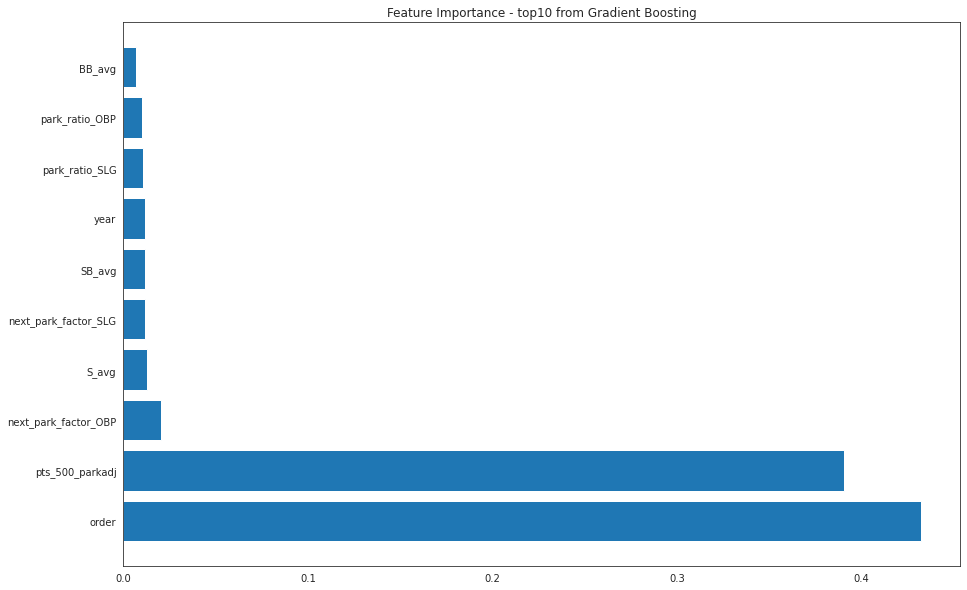

In [ ]:
# Plot top 10 features
# feature_importance10 = gb_importance_lt[:10]
# feature_top10 = gb_importance_column_list[:10]
plt.rcParams['figure.figsize'] = [15, 10]
plt.barh(range(10), gb_importance_lt[0:10], align = 'center')
plt.yticks(range(10), gb_importance_column_list[:10])
plt.title('Feature Importance - top10 from Gradient Boosting')

Text(0.5, 1.0, 'Feature Importance - top20 from Gradient Boosting')

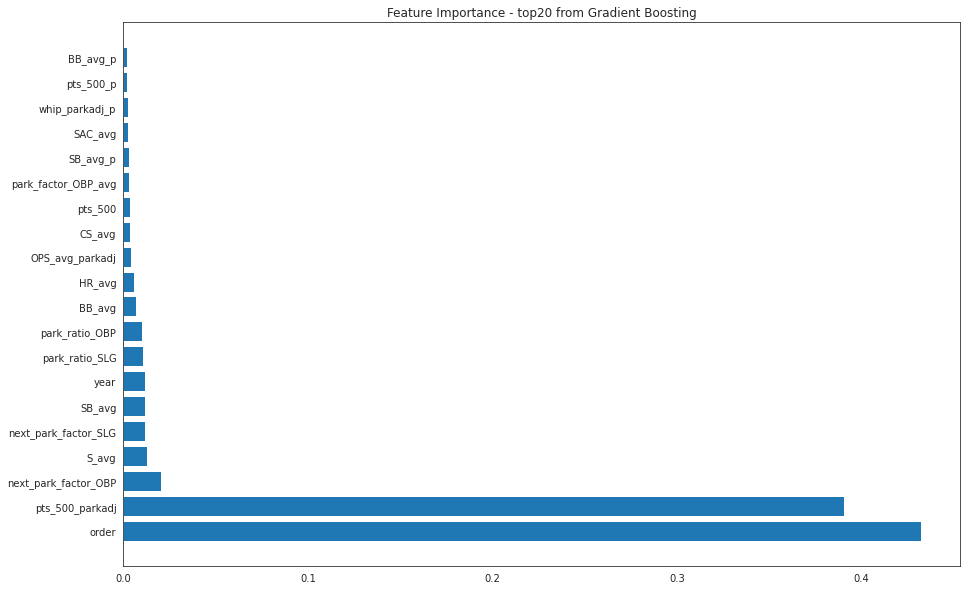

In [ ]:
# Plot top 20 features
plt.rcParams['figure.figsize'] = [15, 10]
plt.barh(range(20), gb_importance_lt[0:20], align = 'center')
plt.yticks(range(20), gb_importance_column_list[:20])
plt.title('Feature Importance - top20 from Gradient Boosting')

Text(0.5, 1.0, 'Feature Importance - top30 from Gradient Boosting')

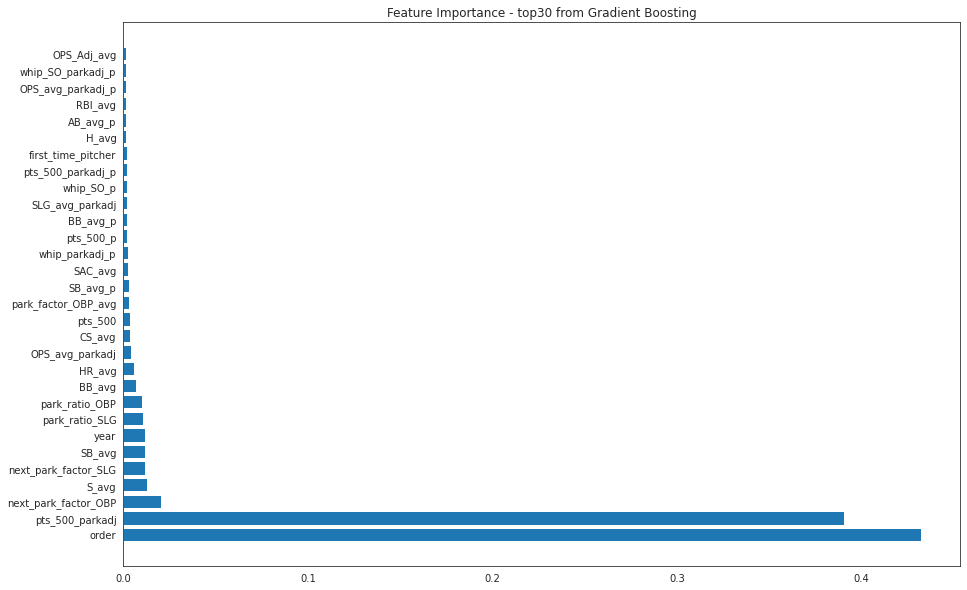

In [ ]:
# Plot top 30 features
plt.rcParams['figure.figsize'] = [15, 10]
plt.barh(range(30), gb_importance_lt[0:30], align = 'center')
plt.yticks(range(30), gb_importance_column_list[:30])
plt.title('Feature Importance - top30 from Gradient Boosting')

In [ ]:
# Print all values
feature_importance = GBR2.feature_importances_
feature_importance

array([0.00000000e+00, 7.51052278e-04, 0.00000000e+00, 1.10603600e-03,
       2.54699141e-04, 7.22849769e-04, 2.63528786e-03, 1.01637505e-03,
       6.64374065e-03, 1.26411920e-02, 8.00095062e-04, 4.47702584e-04,
       5.83666426e-03, 1.62137622e-03, 9.75769831e-04, 7.28570806e-04,
       1.46487833e-03, 6.04166089e-04, 3.78936112e-03, 1.16155641e-02,
       1.15776407e-03, 2.94311539e-03, 1.31481965e-03, 4.02690003e-04,
       3.18992736e-04, 1.42204100e-03, 0.00000000e+00, 1.15409629e-02,
       2.11033928e-02, 4.32145721e-01, 3.23269792e-03, 1.02165758e-02,
       1.08183075e-02, 3.90212081e-01, 2.20311738e-03, 4.19280830e-03,
       7.43596892e-04, 7.94120256e-04, 8.00993842e-04, 4.29317414e-04,
       1.52944893e-03, 6.25050465e-04, 4.46440621e-04, 2.07692853e-03,
       1.10392776e-03, 6.26023555e-04, 2.90480184e-04, 4.01959780e-04,
       1.15527767e-03, 2.64994881e-04, 9.59318939e-04, 1.09838347e-03,
       1.31530519e-03, 2.82490652e-04, 2.99146583e-03, 7.42001893e-04,
      

In [ ]:
# Print the table
df_important.head()

,home,inning,park_factor_SLG,park_factor_OBP,PA_avg,AB_avg,SAC_avg,HBP_avg,BB_avg,S_avg,D_avg,T_avg,HR_avg,H_avg,TB_avg,SO_avg,RBI_avg,R_avg,CS_avg,SB_avg,park_factor_SLG_avg,park_factor_OBP_avg,OBP_avg,SLG_avg,OPS_avg,OPS_Adj_avg,next_home,next_park_factor_SLG,next_park_factor_OBP,order,pts,pts_500,park_ratio_OBP,park_ratio_SLG,pts_500_parkadj,SLG_avg_parkadj,OPS_avg_parkadj,whip_SO_B,whip_SO_B_parkadj,IP_avg_p,PA_avg_p,AB_avg_p,SAC_avg_p,HBP_avg_p,BB_avg_p,S_avg_p,D_avg_p,T_avg_p,HR_avg_p,H_avg_p,TB_avg_p,SO_avg_p,RBI_avg_p,R_avg_p,CS_avg_p,SB_avg_p,whip_p,whip_SO_p,pts_500_p,OBP_avg_p,SLG_avg_p,OPS_avg_p,OPS_Adj_avg_p,pts_500_parkadj_p,SLG_avg_parkadj_p,OPS_avg_parkadj_p,whip_SO_parkadj_p,whip_parkadj_p,year,first_time_pitcher,ops x pts_500 parkadj,ops x pts_500 orderadj,ops23 x pts_500,ops x pts_500 order15,pts_BxP,SLG_BxP,OPS_BxP,whip_SO_BxP,park_ANA,park_ARI,park_ATL,park_BAL,park_BOS,park_CHA,park_CHN,park_CIN,park_CLE,park_COL,park_DET,park_FLO,park_HOU,park_KCA,park_LAN,park_MIA,park_MIL,park_MIN,park_NYA,park_NYN,park_OAK,park_PHI,park_PIT,park_SDN,park_SEA,park_SFN,park_SLN,park_TBA,park_TEX,park_TOR,park_WAS
0,1,5,1.009911,0.983534,1.0,0.917127,0.013812,0.013812,0.055249,0.124309,0.041436,0.005525,0.019337,0.190608,0.301105,0.276243,0.080110,0.127072,0.016575,0.027624,0.995886,1.017679,0.259669,0.328313,0.587982,0.795717,1.0,1.009911,0.983534,7.0,12.2,1.963260,0.966449,1.014082,1.990907,0.332937,0.596262,-0.030387,-0.030815,576.0001,2469.0,2225.0,41.0,13.0,190.0,413.0,106.0,12.0,73.0,604.0,953.0,361.0,267.0,310.0,21.0,29.0,1.378472,0.751736,5568.5,807.0,953.0,1760.0,2405.6,5532.301160,946.804886,1748.558865,0.746849,1.369511,2008,0,3481.217742,497.316820,288.960027,215.810745,11014.296022,315.226043,1042.598986,-0.023014,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,9,1.009911,0.983534,1.0,0.915761,0.013587,0.016304,0.054348,0.125000,0.043478,0.005435,0.019022,0.192935,0.304348,0.277174,0.078804,0.127717,0.016304,0.027174,0.996115,1.017122,0.263587,0.332344,0.595931,0.806801,0.0,0.942517,0.955035,8.0,0.0,1.972554,0.938958,0.946193,1.866417,0.314462,0.563866,-0.029891,-0.028283,591.3334,2528.0,2239.0,40.0,41.0,208.0,363.0,128.0,11.0,69.0,571.0,928.0,445.0,256.0,278.0,19.0,11.0,1.317362,0.564825,5382.6,820.0,928.0,1748.0,2404.0,5160.384643,889.688431,1675.835536,0.541507,1.262976,2008,0,3127.808737,390.976092,263.327606,192.767090,9631.432100,279.773052,944.946700,-0.015315,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,8,1.009911,0.983534,1.0,0.917112,0.013369,0.016043,0.053476,0.122995,0.042781,0.005348,0.021390,0.192513,0.310160,0.283422,0.080214,0.128342,0.016043,0.026738,0.995796,1.016354,0.262032,0.338192,0.600225,0.809850,0.0,0.957631,0.993667,7.0,0.0,1.990909,0.977678,0.961674,1.914606,0.325231,0.577221,-0.037433,-0.035999,619.3333,2586.0,2341.0,23.0,15.0,207.0,383.0,121.0,7.0,67.0,578.0,914.0,484.0,243.0,278.0,22.0,47.0,1.267492,0.486006,5430.1,800.0,914.0,1714.0,2354.0,5125.025091,862.649479,1617.703727,0.458702,1.196282,2008,0,3097.265540,442.466506,263.842920,197.051951,9812.404671,280.560326,933.771755,-0.016513,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,8,1.009911,0.983534,1.0,0.918206,0.013193,0.015831,0.052770,0.124011,0.042216,0.005277,0.021108,0.192612,0.308707,0.284960,0.079156,0.126649,0.015831,0.026385,0.995430,1.016028,0.261214,0.336207,0.597421,0.806392,1.0,1.009911,0.983534,7.0,3.5,1.972559,0.968018,1.014547,2.001254,0.341098,0.606111,-0.039578,-0.040154,646.3335,2589.0,2392.0,24.0,14.0,159.0,381.0,85.0,8.0,63.0,537.0,827.0,778.0,187.0,212.0,17.0,54.0,1.076843,-0.126869,4656.9,710.0,827.0,1537.0,2105.0,4724.845249,839.066121,1559.425186,-0.128721,1.092555,2008,0,3120.806087,445.829441,269.119564,200.992829,9455.616050,286.203514,945.185189,0.005169,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,5,1.016353,0.998417,1.0,0.916883,0.015584,0.015584,0.051948,0.122078,0.041558,0.005195,0.023377,0.192208,0.314286,0.29090

### **8. Scikit-learn modelling (part 2)**
Now we can try to run models again, using the updated features list (based on Gradient Boosting results).

In [ ]:
# Select features
gbr_features = ['order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 'next_park_factor_SLG', 'park_ratio_OBP',
                'pts_500', 'BB_avg', 'HR_avg', 'SLG_avg_parkadj', 'CS_avg']

In [ ]:
# Create new dataframe
df_gbr = df[gbr_features]
df_gbr.head()

,order,park_ratio_SLG,next_park_factor_OBP,S_avg,SB_avg,next_park_factor_SLG,park_ratio_OBP,pts_500,BB_avg,HR_avg,SLG_avg_parkadj,CS_avg
0,7.0,1.014082,0.983534,0.124309,0.027624,1.009911,0.966449,1.963260,0.055249,0.019337,0.332937,0.016575
1,8.0,0.946193,0.955035,0.125000,0.027174,0.942517,0.938958,1.972554,0.054348,0.019022,0.314462,0.016304
2,7.0,0.961674,0.993667,0.122995,0.026738,0.957631,0.977678,1.990909,0.053476,0.021390,0.325231,0.016043
3,7.0,1.014547,0.983534,0.124011,0.026385,1.009911,0.968018,1.972559,0.052770,0.021108,0.341098,0.015831
4,7.0,1.020770,0.998417,0.122078,0.025974,1.016353,0.983119,1.999481,0.051948,0.023377,0.349896,0.015584


In [ ]:
# Check correlation
cor = df[gbr_features].corr()
cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
cor[(cor > 0.7) | (cor < -0.7)]
# As we can see, we have a lot of very correlated features

next_park_factor_OBP  park_ratio_SLG          0.772190
next_park_factor_SLG  park_ratio_SLG          0.879737
                      next_park_factor_OBP    0.874561
park_ratio_OBP        park_ratio_SLG          0.872047
                      next_park_factor_OBP    0.886443
                      next_park_factor_SLG    0.768525
HR_avg                pts_500                 0.734927
SLG_avg_parkadj       pts_500                 0.895991
                      HR_avg                  0.764818
dtype: float64

#### **8-1. Gradient Boosting with Scikit-learn (combination 1)**

In [ ]:
# Define X_train and X_test
X_train = df[gbr_features][(df['year'] < 2017) & (df['year'] >= 2008)]
X_test = df[gbr_features][df['year'] >= 2017]

# Define y_train and y_test
y_train = df['pts'][(df['year'] < 2017) & (df['year'] >= 2008)]
y_test = df['pts'][df['year'] >= 2017]

# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

# Create an instance
GBR3 = GradientBoostingRegressor()
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
GBR3.fit(X_train_subset, y_train_subset)

# Predict y_pred
y_pred = GBR3.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df['year'][df['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.150373  7.558486   9.903896
2018      0.162883  7.348186   9.533106
2019      0.170374  7.715590  10.104516
Total     0.161550  7.540171   9.849163


![](https://i.ibb.co/31fbdnY/image.png)

#### **8-2. Gradient Boosting with Scikit-learn (combination 2 - THE BEST)**

In [ ]:
# Select features (removing 3 highly correlated variables)
gbr_features1 = ['order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
                'pts_500', 'BB_avg', 'HR_avg', 'CS_avg']

In [ ]:
# Check correlation
cor = df[gbr_features1].corr()
cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
cor[(cor > 0.7) | (cor < -0.7)]
# As we can see, we fixed correlation issues

next_park_factor_OBP  park_ratio_SLG    0.772190
HR_avg                pts_500           0.734927
dtype: float64

In [ ]:
# Define X_train and X_test
X_train = df[gbr_features1][(df['year'] < 2017) & (df['year'] >= 2008)]
X_test = df[gbr_features1][df['year'] >= 2017]

# Define y_train and y_test
y_train = df['pts'][(df['year'] < 2017) & (df['year'] >= 2008)]
y_test = df['pts'][df['year'] >= 2017]

# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

# Create an instance
GBR4 = GradientBoostingRegressor(random_state = 123)
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
GBR4.fit(X_train_subset, y_train_subset)

# Predict y_pred
y_pred = GBR4.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df['year'][df['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.150429  7.559371   9.903772
2018      0.162515  7.350239   9.533764
2019      0.172199  7.717013  10.101080
Total     0.162074  7.541625   9.848168


As we can see, we managed to improve our results a bit still.

![](https://i.ibb.co/31fbdnY/image.png)


#### **8-3. Gradient Boosting with Scikit-learn (combination 3)**

In [ ]:
# Select features (removing 3 highly correlated variables)
gbr_features2 = ['order', 'park_ratio_SLG', 'S_avg', 'SB_avg', 
                'pts_500', 'BB_avg', 'CS_avg']

In [ ]:
# Check correlation
cor = df[gbr_features2].corr()
cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
cor[(cor > 0.6) | (cor < -0.6)]
# As we can see, we fixed correlation issues

Series([], dtype: float64)

In [ ]:
# Define X_train and X_test
X_train = df[gbr_features2][(df['year'] < 2017) & (df['year'] >= 2008)]
X_test = df[gbr_features2][df['year'] >= 2017]

# Define y_train and y_test
y_train = df['pts'][(df['year'] < 2017) & (df['year'] >= 2008)]
y_test = df['pts'][df['year'] >= 2017]

# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

# Create an instance
GBR4 = GradientBoostingRegressor(random_state = 123)
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
GBR4.fit(X_train_subset, y_train_subset)

# Predict y_pred
y_pred = GBR4.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df['year'][df['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
cor

,correlation,MAE,RMSE
year,,,
2017,0.150811,7.559066,9.903049
2018,0.162559,7.349326,9.533633
2019,0.171084,7.720642,10.102809
Total,0.161902,7.542419,9.848468


#### **8-4. Gradient Boosting with Scikit-learn (combination 4)**

In [ ]:
# Select features from top10 features
gbr_features3 = ['S_avg', 'BB_avg', 'SAC_avg', 'park_factor_OBP', 'HBP_avg', 'inning', 'PA_avg']

In [ ]:
# Check correlation
cor = df[gbr_features3].corr()
cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
cor[(cor > 0.6) | (cor < -0.6)]
# As we can see, we fixed correlation issues

Series([], dtype: float64)

In [ ]:
# Define X_train and X_test
X_train = df[gbr_features3][(df['year'] < 2017) & (df['year'] >= 2008)]
X_test = df[gbr_features3][df['year'] >= 2017]

# Define y_train and y_test
y_train = df['pts'][(df['year'] < 2017) & (df['year'] >= 2008)]
y_test = df['pts'][df['year'] >= 2017]

# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

# Create an instance
GBR5 = GradientBoostingRegressor(random_state = 123)
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
GBR5.fit(X_train_subset, y_train_subset)

# Predict y_pred
y_pred = GBR5.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df['year'][df['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
cor

,correlation,MAE,RMSE
year,,,
2017,0.082954,7.604193,9.985501
2018,0.083863,7.410517,9.627861
2019,0.081942,7.791325,10.223205
Total,0.083144,7.601378,9.947605


#### **8-5. Gradient Boosting with Scikit-lean (dummy years)**

In [ ]:
# Select features (removing 3 highly correlated variables)
gbr_features = ['order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
               'pts_500', 'BB_avg', 'HR_avg', 'CS_avg', 'year']

In [ ]:
# Create a dataframe
df_gbr = df[gbr_scaled]

In [ ]:
# Create dummy variables
df_gbr = pd.get_dummies(df_gbr, columns = ['year'], drop_first = False, prefix = ['year'])

In [ ]:
# Print head
df_gbr.head()

,order,park_ratio_SLG,next_park_factor_OBP,S_avg,SB_avg,pts_500,BB_avg,HR_avg,CS_avg,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
0,7.0,1.014082,0.983534,0.124309,0.027624,1.963260,0.055249,0.019337,0.016575,1,0,0,0,0,0,0,0,0,0,0,0
1,8.0,0.946193,0.955035,0.125000,0.027174,1.972554,0.054348,0.019022,0.016304,1,0,0,0,0,0,0,0,0,0,0,0
2,7.0,0.961674,0.993667,0.122995,0.026738,1.990909,0.053476,0.021390,0.016043,1,0,0,0,0,0,0,0,0,0,0,0
3,7.0,1.014547,0.983534,0.124011,0.026385,1.972559,0.052770,0.021108,0.015831,1,0,0,0,0,0,0,0,0,0,0,0
4,7.0,1.020770,0.998417,0.122078,0.025974,1.999481,0.051948,0.023377,0.015584,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Print dtypes
df_gbr.dtypes

order                   float64
park_ratio_SLG          float64
next_park_factor_OBP    float64
S_avg                   float64
SB_avg                  float64
pts_500                 float64
BB_avg                  float64
HR_avg                  float64
CS_avg                  float64
year_2008                 uint8
year_2009                 uint8
year_2010                 uint8
year_2011                 uint8
year_2012                 uint8
year_2013                 uint8
year_2014                 uint8
year_2015                 uint8
year_2016                 uint8
year_2017                 uint8
year_2018                 uint8
year_2019                 uint8
dtype: object

In [ ]:
# Convert to integer some columns
df_gbr.iloc[:, 9:] = df_gbr.iloc[:, 9:].astype('int')

In [ ]:
# Print dtypes
df_gbr.dtypes

order                   float64
park_ratio_SLG          float64
next_park_factor_OBP    float64
S_avg                   float64
SB_avg                  float64
pts_500                 float64
BB_avg                  float64
HR_avg                  float64
CS_avg                  float64
year_2008                 int64
year_2009                 int64
year_2010                 int64
year_2011                 int64
year_2012                 int64
year_2013                 int64
year_2014                 int64
year_2015                 int64
year_2016                 int64
year_2017                 int64
year_2018                 int64
year_2019                 int64
dtype: object

In [ ]:
# Define X_train and X_test
X_train = df_gbr[(df['year'] < 2017) & (df['year'] >= 2008)]
X_test = df_gbr[df['year'] >= 2017]

# Define y_train and y_test
y_train = df['pts'][(df['year'] < 2017) & (df['year'] >= 2008)]
y_test = df['pts'][df['year'] >= 2017]

# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

# Create an instance
GBR7 = GradientBoostingRegressor(random_state = 123)
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
GBR7.fit(X_train_subset, y_train_subset)

# Predict y_pred
y_pred = GBR7.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df['year'][df['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
cor

,correlation,MAE,RMSE
year,,,
2017,0.150721,7.554709,9.903844
2018,0.162064,7.345954,9.534231
2019,0.171764,7.714201,10.103150
Total,0.161868,7.537701,9.849046


#### **8-6. Gradient Boosting with updated features from Serena**

In [ ]:
# Read old data
df = pd.read_pickle('./ml_data.pkl')

In [ ]:
# Read new data for 1000 bats
df1000 = pd.read_pickle('./ml_data 1000.pkl')

In [ ]:
gbr_features_new = ['order', 'pts_500_parkadj', 'next_park_factor_OBP', 'next_park_factor_SLG', 'S_avg', 'SB_avg',
                    'year', 'park_ratio_SLG', 'park_ratio_OBP', 'BB_avg']

In [ ]:
# Create new df
gbr_new_df = df[gbr_features_new]

In [ ]:
# Check correlation
cor = df[gbr_features_new].corr()
cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
cor[(cor > 0.7) | (cor < -0.7)]
# As we can see, we have a lot of very correlated features

next_park_factor_SLG  next_park_factor_OBP    0.874561
park_ratio_SLG        next_park_factor_OBP    0.772190
                      next_park_factor_SLG    0.879737
park_ratio_OBP        next_park_factor_OBP    0.886443
                      next_park_factor_SLG    0.768525
                      park_ratio_SLG          0.872047
dtype: float64

In [ ]:
# I removed 3 highly correlated features
gbr_features_new2 = ['order', 'pts_500_parkadj', 'next_park_factor_OBP', 'S_avg', 'SB_avg',
                     'year', 'BB_avg']

In [ ]:
# Check correlation
cor = df[gbr_features_new2].corr()
cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
cor[(cor > 0.5) | (cor < -0.5)]

Series([], dtype: float64)

In [ ]:
# Define X_train and X_test
X_train = df[gbr_features_new2][(df['year'] < 2017) & (df['year'] >= 2008)]
X_test = df[gbr_features_new2][df['year'] >= 2017]

# Define y_train and y_test
y_train = df['pts'][(df['year'] < 2017) & (df['year'] >= 2008)]
y_test = df['pts'][df['year'] >= 2017]

# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

# Create an instance
GBR44 = GradientBoostingRegressor(random_state = 123)
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
GBR44.fit(X_train_subset, y_train_subset)

# Predict y_pred
y_pred = GBR44.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df['year'][df['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.149923  7.585739   9.901988
2018      0.160971  7.381676   9.538233
2019      0.170260  7.742687  10.099753
Total     0.160754  7.569458   9.848564


![](https://i.ibb.co/31fbdnY/image.png)

### **9. Analysis of scaled data**

Here we will try scaled data, trying to improve our performance

#### **9-1. Gradient Boosting with scaled data**

Firs, we will do Gradien Boosting, using features, which already demonstrated the best performance with GBR model.

In [1]:
# Select features (removing 3 highly correlated variables)
gbr_scaled = ['order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
               'pts_500', 'BB_avg', 'HR_avg', 'CS_avg', 'year']

In [3]:
# Create a dataframe
df_gbr_scaled = df[gbr_scaled]

In [ ]:
# Print shape
df_gbr_scaled.shape

In [ ]:
# Print head
df_gbr_scaled.head()

In [ ]:
# Scale non-binary numeric variables
# Create a copy
df_gbr_scaled_s = df_gbr_scaled.copy()

# Scale data
scaler = StandardScaler()
df_gbr_scaled_s[['order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
               'pts_500', 'BB_avg', 'HR_avg', 'CS_avg']] = scaler.fit_transform(df_gbr_scaled_s[['order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
               'pts_500', 'BB_avg', 'HR_avg', 'CS_avg']])

In [ ]:
# Print head
df_gbr_scaled_s.head()

In [ ]:
# Define X_train and X_test
X_train = df_gbr_scaled_s[(df_gbr_scaled_s['year'] < 2017) & (df_gbr_scaled_s['year'] >= 2008)]
X_test = df_gbr_scaled_s[df_gbr_scaled_s['year'] >= 2017]

# Define y_train and y_test
y_train = df['pts'][(df['year'] < 2017) & (df['year'] >= 2008)]
y_test = df['pts'][df['year'] >= 2017]

In [ ]:
# Pick randomly 20000 data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370000]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

In [ ]:
# Create RF instance
GBR6 = GradientBoostingRegressor(random_state = 123)

In [ ]:
# Fit the model (subset of data)
GBR6.fit(X_train_subset, y_train_subset)

In [ ]:
# Predict y_pred
y_pred = GBR6.predict(X_test)

In [ ]:
# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df_gbr_scaled_s['year'][df_gbr_scaled_s['year'] >= 2017]})

In [ ]:
# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

In [ ]:
# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

In [ ]:
# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

![](https://i.ibb.co/31fbdnY/image.png)

### **10. Analysis of new data (100, 250, 500, 1000)** with old features

In [7]:
# Read new data for 1000 bats
df1000 = pd.read_pickle('./ml_data 1000.pkl')

In [8]:
# Read new data for 500 bats
df500 = pd.read_pickle('./ml_data 500 v2.pkl')

In [9]:
# Read new data for 250 bats
df250 = pd.read_pickle('./ml_data 250.pkl')

In [10]:
# Read new data for 1000 bats
df100 = pd.read_pickle('./ml_data 100.pkl')

In [ ]:
# gbr_features_new = ['next_order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
#                     'BB_avg', 'HR_avg', 'CS_avg', 'pts_1000_parkadj', 'ratio_100', 'ratio_250', 'ratio_500']
# these are the features i used for all rollings
# From Mike Thompson to Everyone:  09:16 PM
# np.corrcoef(y_pred, y_actual)
# cor = df[['actual','pred','yr']].groupby('yr').corr().reset_index()
# cor = cor[cor['level_1']=='actual'][['yr','pred']]
# cor.set_index('yr', inplace=True)
# cor.columns = ['R2']

# cor.loc['Total','R2'] =  df[['actual','pred']].corr().iloc[0,1]
# cor['R2'] = cor['R2']**2
# pd.DataFrame({'actual':y,'pred':pred,'year':df['year'][df['test']==1]})
# From Mike Thompson to Everyone:  09:25 PM
# pts_500_p


#### **10-1. GBR for 1000 bats**

In [ ]:
# Use features from the most successful GBR model (Notebook 1)
gbr_features1 = ['next_order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', # next part factor slg and pts500_p
                 'pts_500', 'BB_avg', 'HR_avg', 'CS_avg']
                 
# Define X_train and X_test
X_train = df1000[gbr_features1][(df1000['year'] < 2017) & (df1000['year'] >= 2008)]
X_test = df1000[gbr_features1][df1000['year'] >= 2017]

# Define y_train and y_test
y_train = df1000['pts'][(df1000['year'] < 2017) & (df1000['year'] >= 2008)]
y_test = df1000['pts'][df1000['year'] >= 2017]

# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

# Create an instance
GBR11 = GradientBoostingRegressor(random_state = 5678) # random_state = 123
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
GBR11.fit(X_train_subset, y_train_subset)

# Predict y_pred
y_pred = GBR11.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df1000['year'][df1000['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.162274  7.518991   9.888099
2018      0.174235  7.318037   9.514064
2019      0.180466  7.691695  10.088742
Total     0.172393  7.508966   9.832328


Below you see our best result on old data + our benchmark. We outperformed both.

![](https://i.ibb.co/j5nRzDs/image.png)

#### **10-1a. GBR for 1000 bats (updated features based on old data)**

Here I double check again which features are the best - mine or Serena's

In [ ]:
# Use features from the most successful GBR model (Notebook 1)
gbr_features_new = ['pts_500_parkadj', 'next_park_factor_OBP', 'next_park_factor_SLG', 'S_avg', 'SB_avg',
                    'year', 'park_ratio_SLG', 'park_ratio_OBP', 'BB_avg']
                 
# Define X_train and X_test
X_train = df1000[gbr_features_new][(df1000['year'] < 2017) & (df1000['year'] >= 2008)]
X_test = df1000[gbr_features_new][df1000['year'] >= 2017]

# Define y_train and y_test
y_train = df1000['pts'][(df1000['year'] < 2017) & (df1000['year'] >= 2008)]
y_test = df1000['pts'][df1000['year'] >= 2017]

# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

# Create an instance
GBR11 = GradientBoostingRegressor(random_state = 123)
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
GBR11.fit(X_train_subset, y_train_subset)

# Predict y_pred
y_pred = GBR11.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df1000['year'][df1000['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.138352  7.603361   9.919388
2018      0.149457  7.408515   9.557068
2019      0.158860  7.756016  10.119487
Total     0.148806  7.588741   9.867216


#### **10-2. GBR for 500 bats**

In [ ]:
# Use features from the most successful GBR model (Notebook 1)
gbr_features1 = ['next_order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
                 'pts_500', 'BB_avg', 'HR_avg', 'CS_avg']
                 
# Define X_train and X_test
X_train = df500[gbr_features1][(df500['year'] < 2017) & (df500['year'] >= 2008)]
X_test = df500[gbr_features1][df500['year'] >= 2017]

# Define y_train and y_test
y_train = df500['pts'][(df500['year'] < 2017) & (df500['year'] >= 2008)]
y_test = df500['pts'][df500['year'] >= 2017]

# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

# Create an instance
GBR12 = GradientBoostingRegressor(random_state = 123)
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
GBR12.fit(X_train_subset, y_train_subset)

# Predict y_pred
y_pred = GBR12.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df500['year'][df500['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.161695  7.533682   9.886958
2018      0.172854  7.320753   9.516467
2019      0.179971  7.698465  10.087999
Total     0.171822  7.517030   9.832470


Below you see our best result on old data + our benchmark. We outperformed both.

![](https://i.ibb.co/j5nRzDs/image.png)

#### **10-3. GBR for 250 bats**

In [ ]:
# Use features from the most successful GBR model (Notebook 1)
gbr_features1 = ['next_order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
                 'pts_500', 'BB_avg', 'HR_avg', 'CS_avg']
                 
# Define X_train and X_test
X_train = df250[gbr_features1][(df250['year'] < 2017) & (df250['year'] >= 2008)]
X_test = df250[gbr_features1][df250['year'] >= 2017]

# Define y_train and y_test
y_train = df250['pts'][(df250['year'] < 2017) & (df250['year'] >= 2008)]
y_test = df250['pts'][df250['year'] >= 2017]

# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

# Create an instance
GBR13 = GradientBoostingRegressor(random_state = 123)
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
GBR13.fit(X_train_subset, y_train_subset)

# Predict y_pred
y_pred = GBR13.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df250['year'][df250['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.158884  7.543360   9.891197
2018      0.171038  7.316451   9.519345
2019      0.179126  7.706600  10.088427
Total     0.170328  7.521523   9.834973


Below you see our best result on old data + our benchmark. We outperformed both.

![](https://i.ibb.co/j5nRzDs/image.png)

#### **10-4. GBR for 100 bats**

In [ ]:
# Use features from the most successful GBR model (Notebook 1)
gbr_features1 = ['next_order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
                 'pts_500', 'BB_avg', 'HR_avg', 'CS_avg']
                 
# Define X_train and X_test
X_train = df100[gbr_features1][(df100['year'] < 2017) & (df100['year'] >= 2008)]
X_test = df100[gbr_features1][df100['year'] >= 2017]

# Define y_train and y_test
y_train = df100['pts'][(df100['year'] < 2017) & (df100['year'] >= 2008)]
y_test = df100['pts'][df100['year'] >= 2017]

# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

# Create an instance
GBR14 = GradientBoostingRegressor(random_state = 123)
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
GBR14.fit(X_train_subset, y_train_subset)

# Predict y_pred
y_pred = GBR14.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df100['year'][df100['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.156209  7.540801   9.896455
2018      0.168662  7.311336   9.523230
2019      0.173366  7.710860  10.099907
Total     0.166720  7.520366   9.841898


Below you see our best result on old data + our benchmark. We outperformed both.

![](https://i.ibb.co/j5nRzDs/image.png)

#### **10.5. LGBM for 1000 bats**

I will start from using the same GBR features for LGBM.

In [ ]:
# Use features from the most successful GBR model (Notebook 1)
gbr_features1 = ['next_order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
                 'pts_500', 'BB_avg', 'HR_avg', 'CS_avg']
                 
# Define X_train and X_test
X_train = df1000[gbr_features1][(df1000['year'] < 2017) & (df1000['year'] >= 2008)]
X_test = df1000[gbr_features1][df1000['year'] >= 2017]

# Define y_train and y_test
y_train = df1000['pts'][(df1000['year'] < 2017) & (df1000['year'] >= 2008)]
y_test = df1000['pts'][df1000['year'] >= 2017]

# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

# Create an instance
LGBM11 = LGBMRegressor(random_state = 123)
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
LGBM11.fit(X_train_subset, y_train_subset)

# Predict y_pred
y_pred = LGBM11.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df1000['year'][df1000['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.161376  7.519873   9.889978
2018      0.174733  7.314141   9.513319
2019      0.180517  7.691971  10.088047
Total     0.172345  7.508050   9.832484


Below you see our best result on old data + our benchmark. We outperformed both.

![](https://i.ibb.co/j5nRzDs/image.png)

#### **10-6. LR for 1000 bats**

In [ ]:
# Use features from the most successful GBR model (Notebook 1)
gbr_features1 = ['next_order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
                 'pts_500', 'BB_avg', 'HR_avg', 'CS_avg']
                 
# Define X_train and X_test
X_train = df1000[gbr_features1][(df1000['year'] < 2017) & (df1000['year'] >= 2008)]
X_test = df1000[gbr_features1][df1000['year'] >= 2017]

# Define y_train and y_test
y_train = df1000['pts'][(df1000['year'] < 2017) & (df1000['year'] >= 2008)]
y_test = df1000['pts'][df1000['year'] >= 2017]

# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

# Create an instance
LR11 = LinearRegression()
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
LR11.fit(X_train_subset, y_train_subset)

# Predict y_pred
y_pred = LR11.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df1000['year'][df1000['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.156150  7.545245   9.896029
2018      0.169610  7.345886   9.522621
2019      0.175614  7.720283  10.093892
Total     0.167243  7.536525   9.839514


Below you see our best result on old data + our benchmark. We outperformed both.

![](https://i.ibb.co/j5nRzDs/image.png)

#### **10-7. RR for 1000 bats**

In [ ]:
# Use features from the most successful GBR model (Notebook 1)
gbr_features1 = ['next_order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
                 'pts_500', 'BB_avg', 'HR_avg', 'CS_avg']
                 
# Define X_train and X_test
X_train = df1000[gbr_features1][(df1000['year'] < 2017) & (df1000['year'] >= 2008)]
X_test = df1000[gbr_features1][df1000['year'] >= 2017]

# Define y_train and y_test
y_train = df1000['pts'][(df1000['year'] < 2017) & (df1000['year'] >= 2008)]
y_test = df1000['pts'][df1000['year'] >= 2017]

# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

# Create an instance
RR11 = Ridge()
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
RR11.fit(X_train_subset, y_train_subset)

# Predict y_pred
y_pred = RR11.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df1000['year'][df1000['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.156153  7.545222   9.896026
2018      0.169609  7.345863   9.522620
2019      0.175610  7.720276  10.093904
Total     0.167243  7.536508   9.839517


### **11. Feauture importance for 1000 bats in GBR**

In [ ]:
# Read data
df1000 = pd.read_pickle('./ml_data 1000.pkl')

In [ ]:
# Print top 5 rows
df1000.head()

,game,start,home,team,opp,id,inning,event,park,park_factor_SLG,park_factor_OBP,game_num,new_game,games,PA_avg,AB_avg,SAC_avg,HBP_avg,BB_avg,S_avg,D_avg,T_avg,HR_avg,H_avg,TB_avg,SO_avg,RBI_avg,R_avg,CS_avg,SB_avg,park_factor_SLG_avg,park_factor_OBP_avg,OBP_avg,SLG_avg,OPS_avg,OPS_Adj_avg,idx,maxidx,next_game,next_team,next_opp,next_home,next_park_factor_SLG,next_park_factor_OBP,order_avg,next_order,pts,pts_500,park_ratio_OBP,park_ratio_SLG,order_ratio,pts_500_parkadj,SLG_avg_parkadj,OPS_avg_parkadj,whip_SO_B,whip_SO_B_parkadj,IP_avg_p,PA_avg_p,AB_avg_p,SAC_avg_p,HBP_avg_p,BB_avg_p,S_avg_p,D_avg_p,T_avg_p,HR_avg_p,H_avg_p,TB_avg_p,SO_avg_p,RBI_avg_p,R_avg_p,CS_avg_p,SB_avg_p,ER_avg_p,W_avg_p,L_avg_p,QS_avg_p,whip_p,whip_SO_p,pts_500_p,OBP_avg_p,SLG_avg_p,OPS_avg_p,OPS_Adj_avg_p,pts_500_parkadj_p,SLG_avg_parkadj_p,OPS_avg_parkadj_p,whip_SO_parkadj_p,whip_parkadj_p,year,first_time_pitcher,ops x pts_500 parkadj,ops x pts_500 orderadj,ops23 x pts_500,ops x pts_500 order15,pts_BxP,SLG_BxP,OPS_BxP,whip_SO_BxP
0,HOU200806070,2008-06-07 18:05:00,1,HOU,SLN,aberr001,5,5/L,HOU,1.009911,0.983534,200806070,1,114.0,3.175439,2.912281,0.043860,0.043860,0.175439,0.394737,0.131579,0.017544,0.061404,0.605263,0.956140,0.877193,0.254386,0.403509,0.052632,0.087719,0.995886,1.017679,0.259669,0.328313,0.587982,0.795717,380,380,HOU200806110,HOU,MIL,1.0,1.009911,0.983534,3.111111,8.0,12.2,6.234211,0.966449,1.014082,2.571429,6.322002,0.332937,0.596262,-0.096491,-0.097850,576.0001,2469.0,2225.0,41.0,13.0,190.0,413.0,106.0,12.0,73.0,604.0,953.0,361.0,267.0,310.0,21.0,29.0,293.0,37.0,39.0,50.0,1.378472,0.751736,5568.5,807.0,953.0,1760.0,2405.6,5532.301160,946.804886,1748.558865,0.746849,1.369511,2008,0,11054.393182,1381.799148,917.574822,671.704086,34975.220702,315.226043,1042.598986,-0.073079
1,HOU200806150,2008-06-15 13:05:00,1,HOU,NYA,aberr001,9,K,HOU,1.009911,0.983534,200806150,0,116.0,3.172414,2.905172,0.043103,0.051724,0.172414,0.396552,0.137931,0.017241,0.060345,0.612069,0.965517,0.879310,0.250000,0.405172,0.051724,0.086207,0.996115,1.017122,0.263587,0.332344,0.595931,0.806801,386,386,TBA200806220,HOU,TBA,0.0,0.942517,0.955035,3.105263,7.0,0.0,6.257759,0.938958,0.946193,2.254237,5.921049,0.314462,0.563866,-0.094828,-0.089725,591.3334,2528.0,2239.0,40.0,41.0,208.0,363.0,128.0,11.0,69.0,571.0,928.0,445.0,256.0,278.0,19.0,11.0,252.0,35.0,34.0,55.0,1.317362,0.564825,5382.6,820.0,928.0,1748.0,2404.0,5160.384643,889.688431,1675.835536,0.541507,1.262976,2008,0,9922.703581,1417.529083,835.384128,623.909378,30554.888040,279.773052,944.946700,-0.048587
2,HOU200807020,2008-07-02 19:06:00,1,HOU,LAN,aberr001,8,7/F,HOU,1.009911,0.983534,200807020,1,120.0,3.116667,2.858333,0.041667,0.050000,0.166667,0.383333,0.133333,0.016667,0.066667,0.600000,0.966667,0.883333,0.250000,0.400000,0.050000,0.083333,0.995796,1.016354,0.262032,0.338192,0.600225,0.809850,392,392,ATL200807050,HOU,ATL,0.0,0.957631,0.993667,3.095238,7.0,0.0,6.205000,0.977678,0.961674,2.261538,5.967189,0.325231,0.577221,-0.116667,-0.112195,619.3333,2586.0,2341.0,23.0,15.0,207.0,383.0,121.0,7.0,67.0,578.0,914.0,484.0,243.0,278.0,22.0,47.0,263.0,38.0,35.0,58.0,1.267492,0.486006,5430.1,800.0,914.0,1714.0,2354.0,5125.025091,862.649479,1617.703727,0.458702,1.196282,2008,0,9653.144265,1379.020609,822.310435,614.145247,30581.994558,280.560326,933.771755,-0.051464
3,HOU200808120,2008-08-12 19:06:00,1,HOU,SFN,aberr001,8,S7/L.2-3,HOU,1.009911,0.983534,200808120,1,123.0,3.081301,2.829268,0.040650,0.048780,0.162602,0.382114,0.130081,0.016260,0.065041,0.593496,0.951220,0.878049,0.243902,0.390244,0.048780,0.081301,0.995430,1.016028,0.261214,0.336207,0.597421,0.806392,397,397,HOU200808130,HOU,SFN,1.0,1.009911,0.983534,3.088889,7.0,3.5,6.078049,0.968018,1.014547,2.266187,6.166466,0.341098,0.606111,-0.121951,-0.123725,646.3335,2589.0,2392.0,24.0,14.0,159.0,381.0,85.0,8.0,63.0,537.0,827.0,778.0,187.0,212.0,17.0,54.0,193.0,35.0,32.0,74.0,1.076843,-0.126869,4656.9,710.0,827.0,1537.0,2105.0,4724.845249,839.066121,1559.425186,-0

In [ ]:
# Check shape
df1000.shape

(493475, 99)

In [ ]:
# Drop some columns
df1000 = df1000.drop(['game', 'team', 'opp', 'start', 'id', 'event', 'next_game', 'next_team', 'next_opp', 'idx', 'maxidx', 'game_num'], axis = 1)

In [ ]:
# Print again
df1000.head()

,home,inning,park,park_factor_SLG,park_factor_OBP,new_game,games,PA_avg,AB_avg,SAC_avg,HBP_avg,BB_avg,S_avg,D_avg,T_avg,HR_avg,H_avg,TB_avg,SO_avg,RBI_avg,R_avg,CS_avg,SB_avg,park_factor_SLG_avg,park_factor_OBP_avg,OBP_avg,SLG_avg,OPS_avg,OPS_Adj_avg,next_home,next_park_factor_SLG,next_park_factor_OBP,order_avg,next_order,pts,pts_500,park_ratio_OBP,park_ratio_SLG,order_ratio,pts_500_parkadj,SLG_avg_parkadj,OPS_avg_parkadj,whip_SO_B,whip_SO_B_parkadj,IP_avg_p,PA_avg_p,AB_avg_p,SAC_avg_p,HBP_avg_p,BB_avg_p,S_avg_p,D_avg_p,T_avg_p,HR_avg_p,H_avg_p,TB_avg_p,SO_avg_p,RBI_avg_p,R_avg_p,CS_avg_p,SB_avg_p,ER_avg_p,W_avg_p,L_avg_p,QS_avg_p,whip_p,whip_SO_p,pts_500_p,OBP_avg_p,SLG_avg_p,OPS_avg_p,OPS_Adj_avg_p,pts_500_parkadj_p,SLG_avg_parkadj_p,OPS_avg_parkadj_p,whip_SO_parkadj_p,whip_parkadj_p,year,first_time_pitcher,ops x pts_500 parkadj,ops x pts_500 orderadj,ops23 x pts_500,ops x pts_500 order15,pts_BxP,SLG_BxP,OPS_BxP,whip_SO_BxP
0,1,5,HOU,1.009911,0.983534,1,114.0,3.175439,2.912281,0.043860,0.043860,0.175439,0.394737,0.131579,0.017544,0.061404,0.605263,0.956140,0.877193,0.254386,0.403509,0.052632,0.087719,0.995886,1.017679,0.259669,0.328313,0.587982,0.795717,1.0,1.009911,0.983534,3.111111,8.0,12.2,6.234211,0.966449,1.014082,2.571429,6.322002,0.332937,0.596262,-0.096491,-0.097850,576.0001,2469.0,2225.0,41.0,13.0,190.0,413.0,106.0,12.0,73.0,604.0,953.0,361.0,267.0,310.0,21.0,29.0,293.0,37.0,39.0,50.0,1.378472,0.751736,5568.5,807.0,953.0,1760.0,2405.6,5532.301160,946.804886,1748.558865,0.746849,1.369511,2008,0,11054.393182,1381.799148,917.574822,671.704086,34975.220702,315.226043,1042.598986,-0.073079
1,1,9,HOU,1.009911,0.983534,0,116.0,3.172414,2.905172,0.043103,0.051724,0.172414,0.396552,0.137931,0.017241,0.060345,0.612069,0.965517,0.879310,0.250000,0.405172,0.051724,0.086207,0.996115,1.017122,0.263587,0.332344,0.595931,0.806801,0.0,0.942517,0.955035,3.105263,7.0,0.0,6.257759,0.938958,0.946193,2.254237,5.921049,0.314462,0.563866,-0.094828,-0.089725,591.3334,2528.0,2239.0,40.0,41.0,208.0,363.0,128.0,11.0,69.0,571.0,928.0,445.0,256.0,278.0,19.0,11.0,252.0,35.0,34.0,55.0,1.317362,0.564825,5382.6,820.0,928.0,1748.0,2404.0,5160.384643,889.688431,1675.835536,0.541507,1.262976,2008,0,9922.703581,1417.529083,835.384128,623.909378,30554.888040,279.773052,944.946700,-0.048587
2,1,8,HOU,1.009911,0.983534,1,120.0,3.116667,2.858333,0.041667,0.050000,0.166667,0.383333,0.133333,0.016667,0.066667,0.600000,0.966667,0.883333,0.250000,0.400000,0.050000,0.083333,0.995796,1.016354,0.262032,0.338192,0.600225,0.809850,0.0,0.957631,0.993667,3.095238,7.0,0.0,6.205000,0.977678,0.961674,2.261538,5.967189,0.325231,0.577221,-0.116667,-0.112195,619.3333,2586.0,2341.0,23.0,15.0,207.0,383.0,121.0,7.0,67.0,578.0,914.0,484.0,243.0,278.0,22.0,47.0,263.0,38.0,35.0,58.0,1.267492,0.486006,5430.1,800.0,914.0,1714.0,2354.0,5125.025091,862.649479,1617.703727,0.458702,1.196282,2008,0,9653.144265,1379.020609,822.310435,614.145247,30581.994558,280.560326,933.771755,-0.051464
3,1,8,HOU,1.009911,0.983534,1,123.0,3.081301,2.829268,0.040650,0.048780,0.162602,0.382114,0.130081,0.016260,0.065041,0.593496,0.951220,0.878049,0.243902,0.390244,0.048780,0.081301,0.995430,1.016028,0.261214,0.336207,0.597421,0.806392,1.0,1.009911,0.983534,3.088889,7.0,3.5,6.078049,0.968018,1.014547,2.266187,6.166466,0.341098,0.606111,-0.121951,-0.123725,646.3335,2589.0,2392.0,24.0,14.0,159.0,381.0,85.0,8.0,63.0,537.0,827.0,778.0,187.0,212.0,17.0,54.0,193.0,35.0,32.0,74.0,1.076843,-0.126869,4656.9,710.0,827.0,1537.0,2105.0,4724.845249,839.066121,1559.425186,-0.128721,1.092555,2008,0,9616.142334,1373.734619,829.238330,619.319368,29135.597421,286.203514,945.185189,0.015926
4,0,5,MIL,1.016353,0.998417,1,126.0,3.055556,2.801587,0.047619,0.047619,0.158730,0.373016,0.126984,0.015873,0.071429,0.587302,0.960317,0.888889,0.253968,0.388889,0.047619,0.079365,0.995673,1.015561,0.259740,0.342776,0.602516,0.810309,0.0,1.016353,0.998417,3.083333,1.0,6.5,6.109524,0.983119,1.020770,0.324324,6.236419,0.349896,0.615031,-0.

In [ ]:
# Create dummy variables
df1000 = pd.get_dummies(df1000, columns = ['park'], drop_first = False, prefix = ['park'])

In [ ]:
# Print dtypes again
df1000.dtypes

home                        int64
inning                      int64
park_factor_SLG           float64
park_factor_OBP           float64
new_game                    int32
games                     float64
PA_avg                    float64
AB_avg                    float64
SAC_avg                   float64
HBP_avg                   float64
BB_avg                    float64
S_avg                     float64
D_avg                     float64
T_avg                     float64
HR_avg                    float64
H_avg                     float64
TB_avg                    float64
SO_avg                    float64
RBI_avg                   float64
R_avg                     float64
CS_avg                    float64
SB_avg                    float64
park_factor_SLG_avg       float64
park_factor_OBP_avg       float64
OBP_avg                   float64
SLG_avg                   float64
OPS_avg                   float64
OPS_Adj_avg               float64
next_home                 float64
next_park_fact

In [ ]:
# Print shape
df1000.shape

(493475, 117)

In [ ]:
# Convert data
# df1000.iloc[:, 86:].head() # - check which columns to change
df1000.iloc[:, 86:] = df1000.iloc[:, 86:].astype('int')

In [ ]:
# Print dtypes again
df1000.dtypes

home                        int64
inning                      int64
park_factor_SLG           float64
park_factor_OBP           float64
new_game                    int32
games                     float64
PA_avg                    float64
AB_avg                    float64
SAC_avg                   float64
HBP_avg                   float64
BB_avg                    float64
S_avg                     float64
D_avg                     float64
T_avg                     float64
HR_avg                    float64
H_avg                     float64
TB_avg                    float64
SO_avg                    float64
RBI_avg                   float64
R_avg                     float64
CS_avg                    float64
SB_avg                    float64
park_factor_SLG_avg       float64
park_factor_OBP_avg       float64
OBP_avg                   float64
SLG_avg                   float64
OPS_avg                   float64
OPS_Adj_avg               float64
next_home                 float64
next_park_fact

In [ ]:
gbr_features2 = ['inning', 'park_factor_SLG',	'park_factor_OBP', 'PA_avg', 'AB_avg',	'SAC_avg', 'HBP_avg',	'BB_avg', 'S_avg',	
 'D_avg',	'T_avg', 'HR_avg',	'H_avg', 'TB_avg',	'SO_avg',	'RBI_avg', 'R_avg', 'CS_avg',	'SB_avg',	'park_factor_SLG_avg',
 'park_factor_OBP_avg',	'OBP_avg',	'SLG_avg',	'OPS_avg',	'OPS_Adj_avg', 'next_park_factor_SLG',	'next_park_factor_OBP',	
 'pts_500',	'park_ratio_OBP',	'park_ratio_SLG',	'pts_500_parkadj',	'SLG_avg_parkadj',	'OPS_avg_parkadj',	'whip_SO_B',	'whip_SO_B_parkadj',	
 'IP_avg_p',	'PA_avg_p',	'AB_avg_p',	'SAC_avg_p',	'HBP_avg_p',	'BB_avg_p',	'S_avg_p',	'D_avg_p',	'T_avg_p',	'HR_avg_p',	'H_avg_p',	'TB_avg_p',	
 'SO_avg_p',	'RBI_avg_p',	'R_avg_p',	'CS_avg_p',	'SB_avg_p',	'whip_p',	'whip_SO_p',	'pts_500_p',	'OBP_avg_p',	'SLG_avg_p',	'OPS_avg_p',	
 'OPS_Adj_avg_p', 'pts_500_parkadj_p',	'SLG_avg_parkadj_p',	'OPS_avg_parkadj_p',	'whip_SO_parkadj_p',	'whip_parkadj_p',
 'pts_500_parkadj',	'ops x pts_500 orderadj',	'ops23 x pts_500',	'ops x pts_500 order15',	'pts_BxP',	'SLG_BxP',	'OPS_BxP', 'whip_SO_BxP',
 'order_avg', 'next_order', 'ER_avg_p', 'W_avg_p',	'L_avg_p',	'QS_avg_p', 'games', 'ops x pts_500 parkadj']

In [ ]:
# Define X_train and X_test
X_train = df1000[gbr_features2][(df1000['year'] < 2017) & (df1000['year'] >= 2008)]
X_test = df1000[gbr_features2][df1000['year'] >= 2017]

# Define y_train and y_test
y_train = df1000['pts'][(df1000['year'] < 2017) & (df1000['year'] >= 2008)]
y_test = df1000['pts'][df1000['year'] >= 2017]

# Pick randomly 370000+ data points
rand_index = np.random.rand(len(X_train)).argsort(axis = 0)[0:370221]
X_train_subset = X_train.iloc[rand_index]
y_train_subset = y_train.iloc[rand_index]

# Create an instance
GBR20 = GradientBoostingRegressor(random_state = 123)
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
GBR20.fit(X_train_subset, y_train_subset)

# Predict y_pred
y_pred = GBR20.predict(X_test)

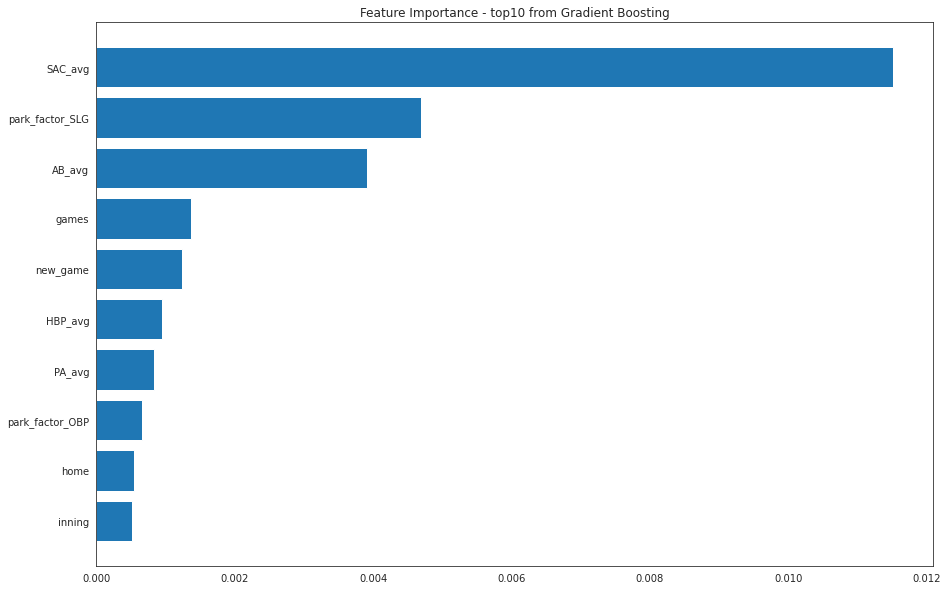

### **12. Final analysis with Scikit-learn**

#### **12-1. GBR**

In [12]:
#get ratio_x = ts_x_parkadji/pts_1000_parkadj for 500, 250 and 100 
df100sub = df100[['pts_500_parkadj']]
df250sub = df250[['pts_500_parkadj']]
df500sub = df500[['pts_500_parkadj']]
df1000sub = df1000[['game', 'year', 'next_order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg',
                 'pts_500', 'BB_avg', 'HR_avg', 'CS_avg', 'pts_500_parkadj', 'pts']]
df100sub = df100sub.rename(columns={"pts_500_parkadj": "pts_100_parkadj"})
df250sub = df250sub.rename(columns={"pts_500_parkadj": "pts_250_parkadj"})
df500sub= df500sub.rename(columns={"pts_500_parkadj": "pts_500_parkadj"})
df1000sub= df1000sub.rename(columns={"pts_500_parkadj": "pts_1000_parkadj"})
#merge dfs
df = pd.concat([df1000sub, df100sub, df250sub, df500sub], axis = 1)
#df.shape
for i in [100, 250, 500]:
  df['ratio_'+str(i)] = df['pts_'+str(i)+'_parkadj']/df['pts_1000_parkadj']
df = df.drop(['game', 'pts_100_parkadj', 'pts_250_parkadj', 'pts_500_parkadj'], axis=1)

In [15]:
# Print the dataframe
df.head()

,year,next_order,park_ratio_SLG,next_park_factor_OBP,S_avg,SB_avg,pts_500,BB_avg,HR_avg,CS_avg,pts_1000_parkadj,pts,ratio_100,ratio_250,ratio_500
0,2008,8.0,1.014082,0.983534,0.394737,0.087719,6.234211,0.175439,0.061404,0.052632,6.322002,12.2,0.817150,0.871796,1.0
1,2008,7.0,0.946193,0.955035,0.396552,0.086207,6.257759,0.172414,0.060345,0.051724,5.921049,0.0,0.792854,0.849562,1.0
2,2008,7.0,0.961674,0.993667,0.383333,0.083333,6.205000,0.166667,0.066667,0.050000,5.967189,0.0,0.845191,0.849228,1.0
3,2008,7.0,1.014547,0.983534,0.382114,0.081301,6.078049,0.162602,0.065041,0.048780,6.166466,3.5,0.876347,0.835956,1.0
4,2008,1.0,1.020770,0.998417,0.373016,0.079365,6.109524,0.158730,0.071429,0.047619,6.236419,6.5,0.951794,0.844955,1.0


In [17]:
#has nas in some columns
#already resetted index 
#not sure why we have NAs when pts_x_parkadj and pts_1000_parkadj have no NAs
df.isna().sum()
df1 = df.dropna()
df.shape

(493475, 15)

In [18]:
print("excluded number of rows:")
df.shape[0]-df1.shape[0]

excluded number of rows:


478

In [19]:
# Define X_train and X_test
gbr_features_new = ['next_order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
                    'BB_avg', 'HR_avg', 'CS_avg', 'pts_1000_parkadj', 'ratio_100', 'ratio_250', 'ratio_500']

X_train = df1[gbr_features_new][(df1['year'] < 2017) & (df1['year'] >= 2008)]
X_test = df1[gbr_features_new][df1['year'] >= 2017]

# Define y_train and y_test
y_train = df1['pts'][(df1['year'] < 2017) & (df1['year'] >= 2008)]
y_test = df1['pts'][df1['year'] >= 2017]

# Create an instance
GBR = GradientBoostingRegressor(random_state = 123)
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
GBR.fit(X_train, y_train)

# Predict y_pred
y_pred = GBR.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df1['year'][df1['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.163121  7.527636   9.886543
2018      0.172930  7.319181   9.518879
2019      0.177433  7.704088  10.092732
Total     0.171540  7.516337   9.834708


In [36]:
# Calculate R-squared for GBR model
print(0.163121**2)
print(0.172930**2)
print(0.177433**2)
print(0.171540**2)

0.026608460640999997
0.029904784900000002
0.031482469489
0.0294259716


#### **12-2. LGBM**

In [38]:
# Define X_train and X_test
gbr_features_new = ['next_order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
                    'BB_avg', 'HR_avg', 'CS_avg', 'pts_1000_parkadj', 'ratio_100', 'ratio_250', 'ratio_500']

X_train = df1[gbr_features_new][(df1['year'] < 2017) & (df1['year'] >= 2008)]
X_test = df1[gbr_features_new][df1['year'] >= 2017]

# Define y_train and y_test
y_train = df1['pts'][(df1['year'] < 2017) & (df1['year'] >= 2008)]
y_test = df1['pts'][df1['year'] >= 2017]

# Create an instance
LGBM = LG(random_state = 123)
# This is a base model and I do not add any hyperparameters here

# Fit the model (subset of data)
LGBM.fit(X_train, y_train)

# Predict y_pred
y_pred = LGBM.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df1['year'][df1['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.162066  7.527609   9.888953
2018      0.172128  7.320112   9.520341
2019      0.179138  7.698073  10.090480
Total     0.171480  7.514649   9.835227


In [39]:
# Calculate R-squared for LGBM model
print(0.162066**2)
print(0.172128**2)
print(0.179138**2)
print(0.171480**2)

0.026265388355999997
0.029628048384000003
0.032090423044
0.0294053904


#### **12-3. Linear Regression**

In [41]:
# Define X_train and X_test
gbr_features_new = ['next_order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
                    'BB_avg', 'HR_avg', 'CS_avg', 'pts_1000_parkadj', 'ratio_100', 'ratio_250', 'ratio_500']

X_train = df1[gbr_features_new][(df1['year'] < 2017) & (df1['year'] >= 2008)]
X_test = df1[gbr_features_new][df1['year'] >= 2017]

# Define y_train and y_test
y_train = df1['pts'][(df1['year'] < 2017) & (df1['year'] >= 2008)]
y_test = df1['pts'][df1['year'] >= 2017]

# Create an instance
LR = LinearRegression()

# Fit the model (subset of data)
LR.fit(X_train, y_train)

# Predict y_pred
y_pred = LR.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df1['year'][df1['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.157609  7.553237   9.893539
2018      0.170995  7.343817   9.522620
2019      0.177407  7.724806  10.090295
Total     0.169141  7.539999   9.837445


In [42]:
# Calculate R-squared for LR model
print(0.157609**2)
print(0.170995**2)
print(0.177407**2)
print(0.169141**2)

0.024840596880999998
0.029239290025000003
0.031473243649000004
0.028608677881000005


#### **12-4. Ridge Regression**

In [43]:
# Define X_train and X_test
gbr_features_new = ['next_order', 'park_ratio_SLG', 'next_park_factor_OBP', 'S_avg', 'SB_avg', 
                    'BB_avg', 'HR_avg', 'CS_avg', 'pts_1000_parkadj', 'ratio_100', 'ratio_250', 'ratio_500']

X_train = df1[gbr_features_new][(df1['year'] < 2017) & (df1['year'] >= 2008)]
X_test = df1[gbr_features_new][df1['year'] >= 2017]

# Define y_train and y_test
y_train = df1['pts'][(df1['year'] < 2017) & (df1['year'] >= 2008)]
y_test = df1['pts'][df1['year'] >= 2017]

# Create an instance
RR = Ridge()

# Fit the model (subset of data)
RR.fit(X_train, y_train)

# Predict y_pred
y_pred = RR.predict(X_test)

# Create predict
pred = pd.DataFrame({'pred': y_pred, 'actual': y_test, 'year': df1['year'][df1['year'] >= 2017]})

# Calculate residuals, MAE, and RMSE 
pred['residuals'] = pred['actual'] - pred['pred']
pred['MAE'] = pred['residuals'].abs()
pred['RMSE'] = pred['residuals']**2

# Calculate correlation, group it by year
cor = pred[['actual','pred','year']].groupby('year').corr().reset_index()
cor = cor[cor['level_1'] == 'actual'][['year','pred']]

# Add year column
cor.set_index('year', inplace = True)

# Add correlation
cor.columns = ['correlation']

# Put all metrics together per year and total
cor.loc['Total','correlation'] =  pred[['actual','pred']].corr().iloc[0, 1]
err = pred[['year','MAE','RMSE']].groupby('year').mean()
err['RMSE'] = err['RMSE']**0.5
err.loc['Total', 'MAE'] = pred['residuals'].abs().mean()
err.loc['Total', 'RMSE'] = pred['RMSE'].mean()**0.5
cor = cor.join(err)

# Print result
print(cor)

       correlation       MAE       RMSE
year                                   
2017      0.157613  7.553214   9.893535
2018      0.170995  7.343793   9.522619
2019      0.177405  7.724800  10.090304
Total     0.169141  7.539982   9.837446


In [44]:
# Calculate R-squared for RR model
print(0.157613**2)
print(0.170995**2)
print(0.177405**2)
print(0.169141**2)

0.024841857769
0.029239290025000003
0.031472534025000005
0.028608677881000005


### **13. Additional work**

- Feature selection (options with different variables)
- Different sizes of datasets
- Scaling of data
- Analysis of scaled data
- Grid Search (too slow) and Random Search (no significant improvement)